In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns
plt.style.use('seaborn-dark-palette')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
import os
import gc

MENS_DIR = '/Users/justinpassek/Downloads/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament'
WOMENS_DIR = '/Users/justinpassek/Downloads/google-cloud-ncaa-march-madness-2020-division-1-womens-tournament'

In [42]:
Mss = pd.read_csv(f'{MENS_DIR}/MSampleSubmissionStage1_2020.csv')
Wss = pd.read_csv(f'{WOMENS_DIR}/WSampleSubmissionStage1_2020.csv')
Mss.head()

,ID,Pred
0,2015_1107_1112,0.5
1,2015_1107_1116,0.5
2,2015_1107_1124,0.5
3,2015_1107_1125,0.5
4,2015_1107_1129,0.5


In [43]:
MTeams = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MTeams.csv')
MTeams.sort_values('FirstD1Season', ascending=False).head(5)

,TeamID,TeamName,FirstD1Season,LastD1Season
366,1467,Merrimack,2020,2020
365,1466,North Alabama,2019,2020
364,1465,Cal Baptist,2019,2020
112,1213,Grand Canyon,2014,2020
161,1262,MA Lowell,2014,2020


In [44]:
WTeams = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WTeams.csv')
WTeams.head()

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


In [45]:
MSeasons = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MSeasons.csv')
WSeasons = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WSeasons.csv')
MSeasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [46]:
MNCAATourneySeeds = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MNCAATourneySeeds.csv')
WNCAATourneySeeds = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WNCAATourneySeeds.csv')

In [47]:
# As Lets join this with the teams data to see some of the past matchups
WNCAATourneySeeds.merge(WTeams, validate='many_to_one').head()

,Season,Seed,TeamID,TeamName
0,1998,W01,3330,Old Dominion
1,1999,W02,3330,Old Dominion
2,2000,X04,3330,Old Dominion
3,2001,Z11,3330,Old Dominion
4,2002,Y07,3330,Old Dominion


In [48]:
# As Lets join this with the teams data to see some of the past matchups
MNCAATourneySeeds.merge(MTeams, validate='many_to_one').head()

,Season,Seed,TeamID,TeamName,FirstD1Season,LastD1Season
0,1985,W01,1207,Georgetown,1985,2020
1,1986,X04,1207,Georgetown,1985,2020
2,1987,X01,1207,Georgetown,1985,2020
3,1988,W08,1207,Georgetown,1985,2020
4,1989,W01,1207,Georgetown,1985,2020


In [49]:
MRegularSeasonCompactResults = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
WRegularSeasonCompactResults = pd.read_csv(f'{WOMENS_DIR}/WDataFiles_Stage1/WRegularSeasonCompactResults.csv')

In [50]:
# We have the team the won, lost and the score.
MRegularSeasonCompactResults.head(5)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [51]:
# Lets Add the winning and losing team names to the results
MRegularSeasonCompactResults = \
    MRegularSeasonCompactResults \
    .merge(MTeams[['TeamName', 'TeamID']],
           left_on='WTeamID',
           right_on='TeamID',
           validate='many_to_one') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'WTeamName'}) \
    .merge(MTeams[['TeamName', 'TeamID']],
           left_on='LTeamID',
           right_on='TeamID') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'LTeamName'})

WRegularSeasonCompactResults = \
    WRegularSeasonCompactResults \
    .merge(WTeams[['TeamName', 'TeamID']],
           left_on='WTeamID',
           right_on='TeamID',
           validate='many_to_one') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'WTeamName'}) \
    .merge(WTeams[['TeamName', 'TeamID']],
           left_on='LTeamID',
           right_on='TeamID') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'LTeamName'})

In [52]:
WRegularSeasonCompactResults.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
0,1998,18,3104,91,3202,41,H,0,Alabama,Furman
1,2009,22,3349,66,3202,62,H,0,Rice,Furman
2,2008,6,3435,68,3202,51,H,0,Vanderbilt,Furman
3,2017,18,3141,81,3202,71,H,0,C Michigan,Furman
4,2008,55,3207,78,3202,58,N,0,Georgetown,Furman


In [53]:
WRegularSeasonCompactResults['Score_Diff'] = WRegularSeasonCompactResults['WScore'] - WRegularSeasonCompactResults['LScore']
MRegularSeasonCompactResults['Score_Diff'] = MRegularSeasonCompactResults['WScore'] - MRegularSeasonCompactResults['LScore']

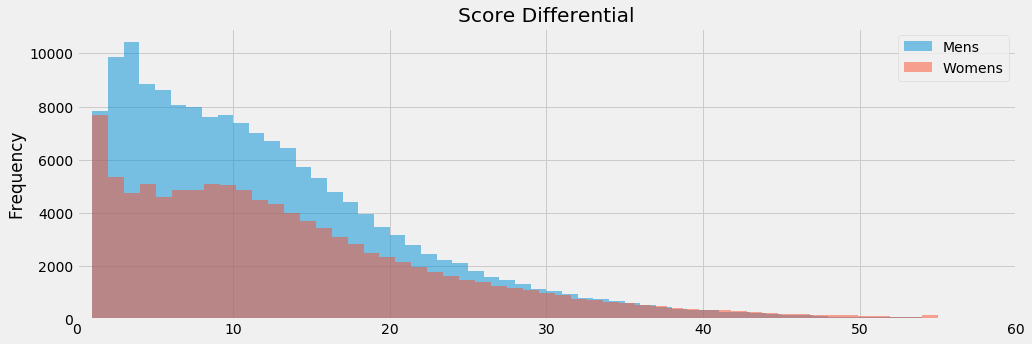

In [54]:
plt.style.use('fivethirtyeight')
MRegularSeasonCompactResults['Score_Diff'] \
    .plot(kind='hist',
          bins=90,
          figsize=(15, 5),
          label='Mens',
          alpha=0.5)
WRegularSeasonCompactResults['Score_Diff'] \
    .plot(kind='hist',
          bins=105,
          figsize=(15, 5),
          label='Womens',
          alpha=0.5)
plt.title('Score Differential')
plt.xlim(0,60)
plt.legend()
plt.show()

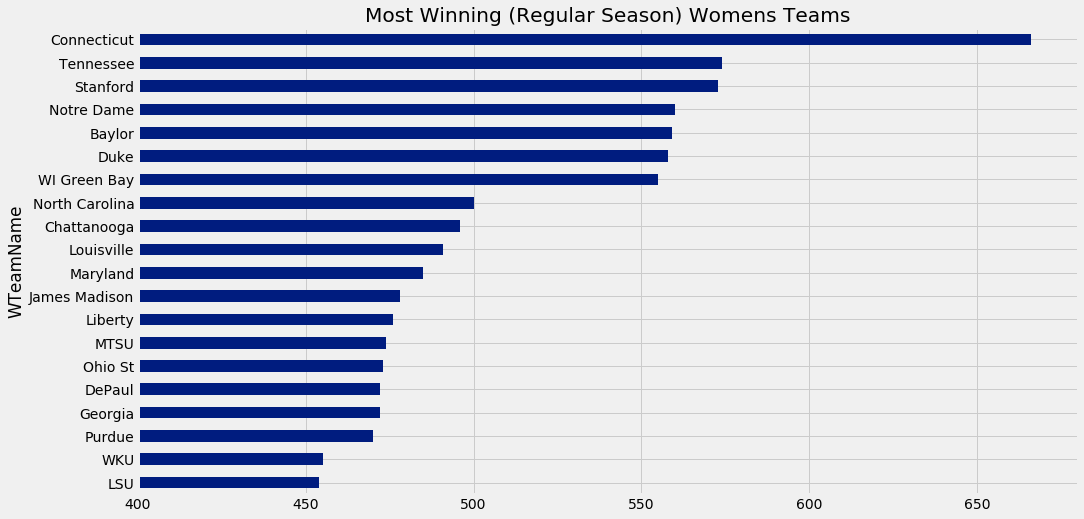

In [55]:
plt.style.use('fivethirtyeight')
WRegularSeasonCompactResults['counter'] = 1
WRegularSeasonCompactResults.groupby('WTeamName')['counter'] \
    .count() \
    .sort_values() \
    .tail(20) \
    .plot(kind='barh',
          title='Most Winning (Regular Season) Womens Teams',
          figsize=(15, 8),
          xlim=(400, 680),
          color=mypal[0])
plt.show()

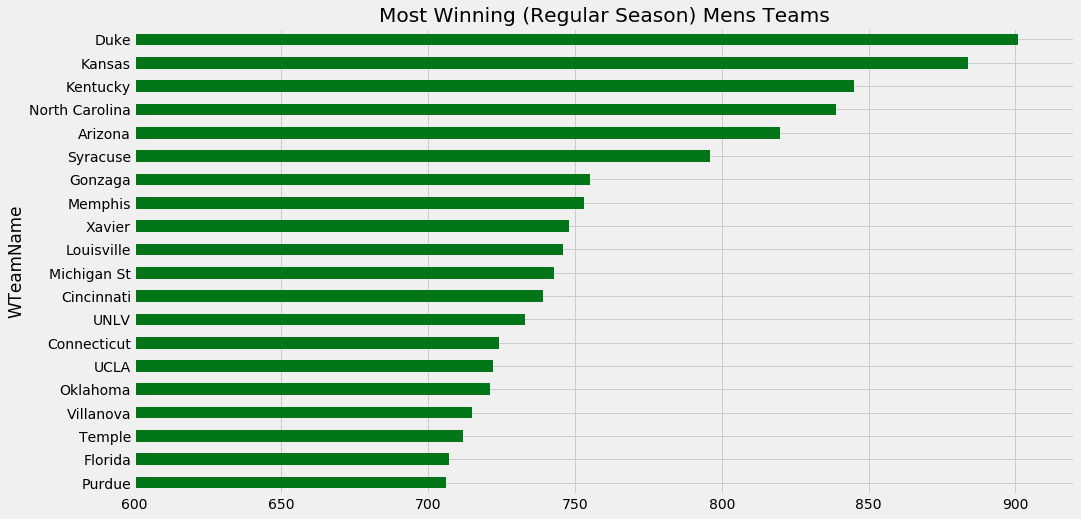

In [56]:
plt.style.use('fivethirtyeight')
MRegularSeasonCompactResults['counter'] = 1
MRegularSeasonCompactResults.groupby('WTeamName')['counter'] \
    .count() \
    .sort_values() \
    .tail(20) \
    .plot(kind='barh',
          title='Most Winning (Regular Season) Mens Teams',
          figsize=(15, 8),
          xlim=(600, 920),
          color=mypal[1])
plt.show()

In [58]:
for year in [2015, 2016, 2017, 2018, 2019]:
    mens_events.append(pd.read_csv(f'{MENS_DIR}/MEvents{year}.csv'))
MEvents = pd.concat(mens_events)
print(MEvents.shape)
MEvents.head()

NameError: name 'mens_events' is not defined

In [19]:
mens_events = []
for year in [2015, 2016, 2017, 2018, 2019]:
    mens_events.append(pd.read_csv(f'{MENS_DIR}/MEvents{year}.csv'))
MEvents = pd.concat(mens_events)
print(MEvents.shape)
MEvents.head()

(13149684, 17)


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0


In [21]:
womens_events = []
for year in [2015, 2016, 2017, 2018, 2019]:
    womens_events.append(pd.read_csv(f'{WOMENS_DIR}/WEvents{year}.csv'))
WEvents = pd.concat(womens_events)
print(WEvents.shape)
WEvents.head()

(12744264, 17)


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,3103,3127,80,49,0,0,11,3103,95,miss2,lay,0,0,0
1,2,2015,11,3103,3127,80,49,0,0,11,3103,84,reb,off,0,0,0
2,3,2015,11,3103,3127,80,49,0,0,14,3103,84,made2,lay,0,0,0
3,4,2015,11,3103,3127,80,49,0,0,42,3127,823,miss2,jump,0,0,0
4,5,2015,11,3103,3127,80,49,0,0,42,3103,91,reb,def,0,0,0


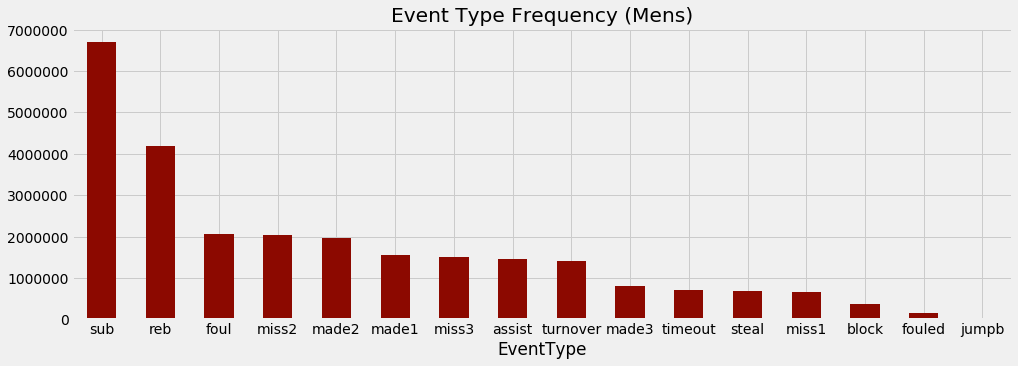

In [22]:
# Event Types
plt.style.use('fivethirtyeight')
MEvents['counter'] = 1
MEvents.groupby('EventType')['counter'] \
    .sum() \
    .sort_values(ascending=False) \
    .plot(kind='bar',
          figsize=(15, 5),
         color=mypal[2],
         title='Event Type Frequency (Mens)')
plt.xticks(rotation=0)
plt.show()

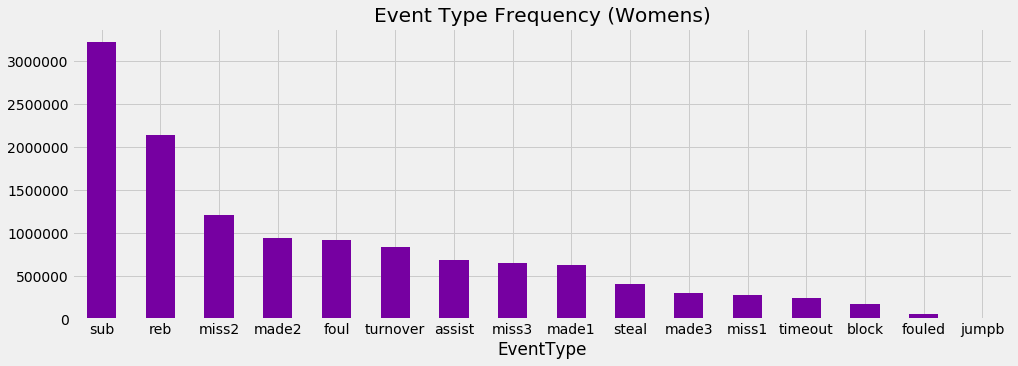

In [23]:
# Event Types
plt.style.use('fivethirtyeight')
WEvents['counter'] = 1
WEvents.groupby('EventType')['counter'] \
    .sum() \
    .sort_values(ascending=False) \
    .plot(kind='bar',
          figsize=(15, 5),
         color=mypal[3],
         title='Event Type Frequency (Womens)')
plt.xticks(rotation=0)
plt.show()

In [24]:
area_mapping = {0: np.nan,
                1: 'under basket',
                2: 'in the paint',
                3: 'inside right wing',
                4: 'inside right',
                5: 'inside center',
                6: 'inside left',
                7: 'inside left wing',
                8: 'outside right wing',
                9: 'outside right',
                10: 'outside center',
                11: 'outside left',
                12: 'outside left wing',
                13: 'backcourt'}

MEvents['Area_Name'] = MEvents['Area'].map(area_mapping)

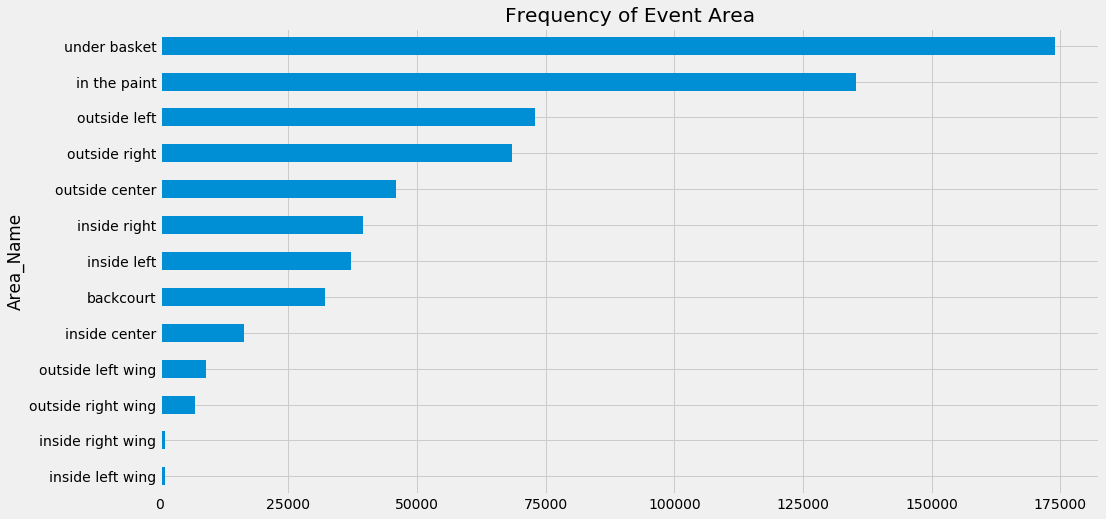

In [25]:
MEvents.groupby('Area_Name')['counter'].sum() \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 8),
          title='Frequency of Event Area')
plt.show()

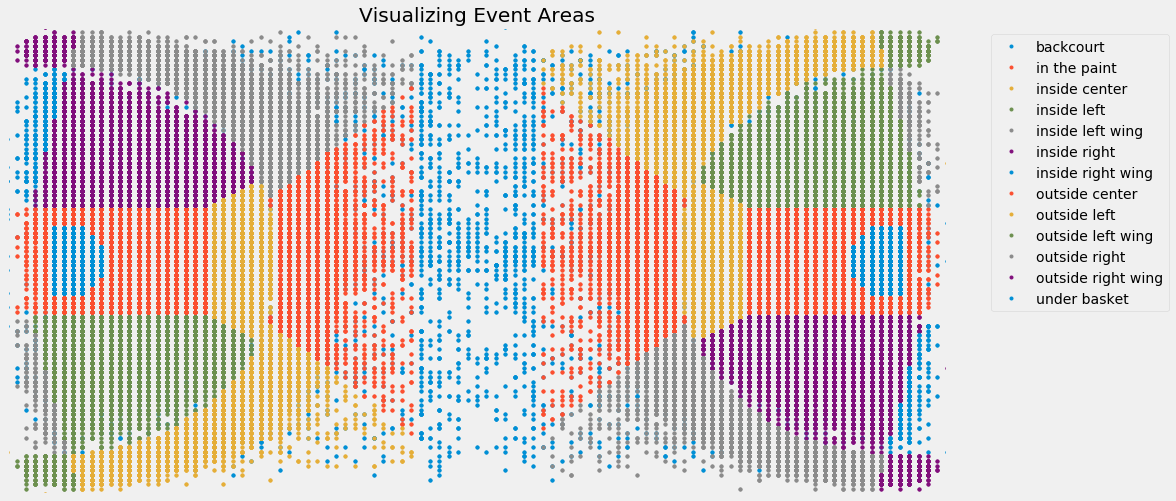

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
for i, d in MEvents.loc[~MEvents['Area_Name'].isna()].groupby('Area_Name'):
    d.plot(x='X', y='Y', style='.', label=i, ax=ax, title='Visualizing Event Areas')
    ax.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.show()

In [27]:
# Normalize X, Y positions for court dimentions
# Court is 50 feet wide and 94 feet end to end.
MEvents['X_'] = (MEvents['X'] * (94/100))
MEvents['Y_'] = (MEvents['Y'] * (50/100))

WEvents['X_'] = (WEvents['X'] * (94/100))
WEvents['Y_'] = (WEvents['Y'] * (50/100))

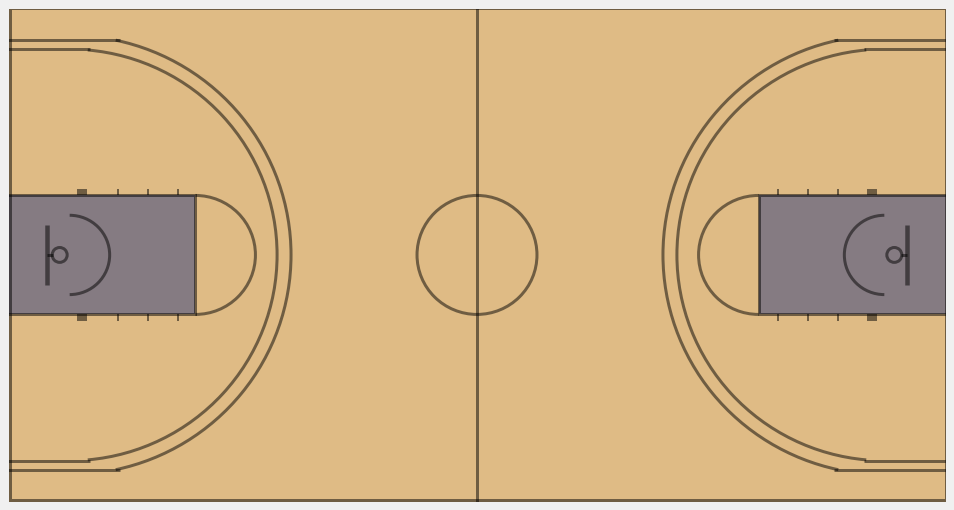

In [28]:
def create_ncaa_full_court(ax=None, three_line='mens', court_color='#dfbb85',
                           lw=3, lines_color='black', lines_alpha=0.5,
                           paint_fill='blue', paint_alpha=0.4,
                           inner_arc=False):
    """
    Version 2020.2.19
    Creates NCAA Basketball Court
    Dimensions are in feet (Court is 97x50 ft)
    Created by: Rob Mulla / https://github.com/RobMulla

    * Note that this function uses "feet" as the unit of measure.
    * NCAA Data is provided on a x range: 0, 100 and y-range 0 to 100
    * To plot X/Y positions first convert to feet like this:
    ```
    Events['X_'] = (Events['X'] * (94/100))
    Events['Y_'] = (Events['Y'] * (50/100))
    ```
    
    ax: matplotlib axes if None gets current axes using `plt.gca`


    three_line: 'mens', 'womens' or 'both' defines 3 point line plotted
    court_color : (hex) Color of the court
    lw : line width
    lines_color : Color of the lines
    lines_alpha : transparency of lines
    paint_fill : Color inside the paint
    paint_alpha : transparency of the "paint"
    inner_arc : paint the dotted inner arc
    """
    if ax is None:
        ax = plt.gca()

    # Create Pathes for Court Lines
    center_circle = Circle((94/2, 50/2), 6,
                           linewidth=lw, color=lines_color, lw=lw,
                           fill=False, alpha=lines_alpha)
    hoop_left = Circle((5.25, 50/2), 1.5 / 2,
                       linewidth=lw, color=lines_color, lw=lw,
                       fill=False, alpha=lines_alpha)
    hoop_right = Circle((94-5.25, 50/2), 1.5 / 2,
                        linewidth=lw, color=lines_color, lw=lw,
                        fill=False, alpha=lines_alpha)

    # Paint - 18 Feet 10 inches which converts to 18.833333 feet - gross!
    left_paint = Rectangle((0, (50/2)-6), 18.833333, 12,
                           fill=paint_fill, alpha=paint_alpha,
                           lw=lw, edgecolor=None)
    right_paint = Rectangle((94-18.83333, (50/2)-6), 18.833333,
                            12, fill=paint_fill, alpha=paint_alpha,
                            lw=lw, edgecolor=None)
    
    left_paint_boarder = Rectangle((0, (50/2)-6), 18.833333, 12,
                           fill=False, alpha=lines_alpha,
                           lw=lw, edgecolor=lines_color)
    right_paint_boarder = Rectangle((94-18.83333, (50/2)-6), 18.833333,
                            12, fill=False, alpha=lines_alpha,
                            lw=lw, edgecolor=lines_color)

    left_arc = Arc((18.833333, 50/2), 12, 12, theta1=-
                   90, theta2=90, color=lines_color, lw=lw,
                   alpha=lines_alpha)
    right_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=90,
                    theta2=-90, color=lines_color, lw=lw,
                    alpha=lines_alpha)
    
    leftblock1 = Rectangle((7, (50/2)-6-0.666), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    leftblock2 = Rectangle((7, (50/2)+6), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(leftblock1)
    ax.add_patch(leftblock2)
    
    left_l1 = Rectangle((11, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l2 = Rectangle((14, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l3 = Rectangle((17, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(left_l1)
    ax.add_patch(left_l2)
    ax.add_patch(left_l3)
    left_l4 = Rectangle((11, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l5 = Rectangle((14, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l6 = Rectangle((17, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(left_l4)
    ax.add_patch(left_l5)
    ax.add_patch(left_l6)
    
    rightblock1 = Rectangle((94-7-1, (50/2)-6-0.666), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    rightblock2 = Rectangle((94-7-1, (50/2)+6), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(rightblock1)
    ax.add_patch(rightblock2)

    right_l1 = Rectangle((94-11, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l2 = Rectangle((94-14, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l3 = Rectangle((94-17, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(right_l1)
    ax.add_patch(right_l2)
    ax.add_patch(right_l3)
    right_l4 = Rectangle((94-11, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l5 = Rectangle((94-14, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l6 = Rectangle((94-17, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(right_l4)
    ax.add_patch(right_l5)
    ax.add_patch(right_l6)
    
    # 3 Point Line
    if (three_line == 'mens') | (three_line == 'both'):
        # 22' 1.75" distance to center of hoop
        three_pt_left = Arc((6.25, 50/2), 44.291, 44.291, theta1=-78,
                            theta2=78, color=lines_color, lw=lw,
                            alpha=lines_alpha)
        three_pt_right = Arc((94-6.25, 50/2), 44.291, 44.291,
                             theta1=180-78, theta2=180+78,
                             color=lines_color, lw=lw, alpha=lines_alpha)

        # 4.25 feet max to sideline for mens
        ax.plot((0, 11.25), (3.34, 3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((0, 11.25), (50-3.34, 50-3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (3.34, 3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (50-3.34, 50-3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.add_patch(three_pt_left)
        ax.add_patch(three_pt_right)

    if (three_line == 'womens') | (three_line == 'both'):
        # womens 3
        three_pt_left_w = Arc((6.25, 50/2), 20.75 * 2, 20.75 * 2, theta1=-85,
                              theta2=85, color=lines_color, lw=lw, alpha=lines_alpha)
        three_pt_right_w = Arc((94-6.25, 50/2), 20.75 * 2, 20.75 * 2,
                               theta1=180-85, theta2=180+85,
                               color=lines_color, lw=lw, alpha=lines_alpha)

        # 4.25 inches max to sideline for mens
        ax.plot((0, 8.3), (4.25, 4.25), color=lines_color,
                lw=lw, alpha=lines_alpha)
        ax.plot((0, 8.3), (50-4.25, 50-4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (4.25, 4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (50-4.25, 50-4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)

        ax.add_patch(three_pt_left_w)
        ax.add_patch(three_pt_right_w)

    # Add Patches
    ax.add_patch(left_paint)
    ax.add_patch(left_paint_boarder)
    ax.add_patch(right_paint)
    ax.add_patch(right_paint_boarder)
    ax.add_patch(center_circle)
    ax.add_patch(hoop_left)
    ax.add_patch(hoop_right)
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)
    
    if inner_arc:
        left_inner_arc = Arc((18.833333, 50/2), 12, 12, theta1=90,
                             theta2=-90, color=lines_color, lw=lw,
                       alpha=lines_alpha, ls='--')
        right_inner_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=-90,
                        theta2=90, color=lines_color, lw=lw,
                        alpha=lines_alpha, ls='--')
        ax.add_patch(left_inner_arc)
        ax.add_patch(right_inner_arc)

    # Restricted Area Marker
    restricted_left = Arc((6.25, 50/2), 8, 8, theta1=-90,
                        theta2=90, color=lines_color, lw=lw,
                        alpha=lines_alpha)
    restricted_right = Arc((94-6.25, 50/2), 8, 8,
                         theta1=180-90, theta2=180+90,
                         color=lines_color, lw=lw, alpha=lines_alpha)
    ax.add_patch(restricted_left)
    ax.add_patch(restricted_right)
    
    # Backboards
    ax.plot((4, 4), ((50/2) - 3, (50/2) + 3),
            color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((94-4, 94-4), ((50/2) - 3, (50/2) + 3),
            color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((4, 4.6), (50/2, 50/2), color=lines_color,
            lw=lw, alpha=lines_alpha)
    ax.plot((94-4, 94-4.6), (50/2, 50/2),
            color=lines_color, lw=lw, alpha=lines_alpha)

    # Half Court Line
    ax.axvline(94/2, color=lines_color, lw=lw, alpha=lines_alpha)

    # Boarder
    boarder = Rectangle((0.3,0.3), 94-0.4, 50-0.4, fill=False, lw=3, color='black', alpha=lines_alpha)
    ax.add_patch(boarder)
    
    # Plot Limit
    ax.set_xlim(0, 94)
    ax.set_ylim(0, 50)
    ax.set_facecolor(court_color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    return ax


fig, ax = plt.subplots(figsize=(15, 8.5))
create_ncaa_full_court(ax, three_line='both', paint_alpha=0.4)
plt.show()

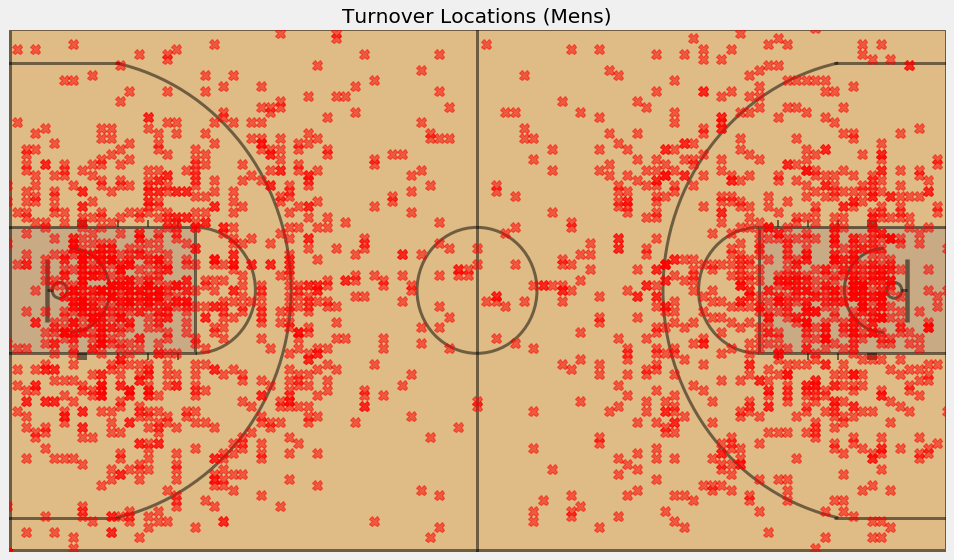

In [29]:
fig, ax = plt.subplots(figsize=(15, 7.8))
ms = 10
ax = create_ncaa_full_court(ax, paint_alpha=0.1)
MEvents.query('EventType == "turnover"') \
    .plot(x='X_', y='Y_', style='X',
          title='Turnover Locations (Mens)',
          c='red',
          alpha=0.3,
         figsize=(15, 9),
         label='Steals',
         ms=ms,
         ax=ax)
ax.set_xlabel('')
ax.get_legend().remove()
plt.show()

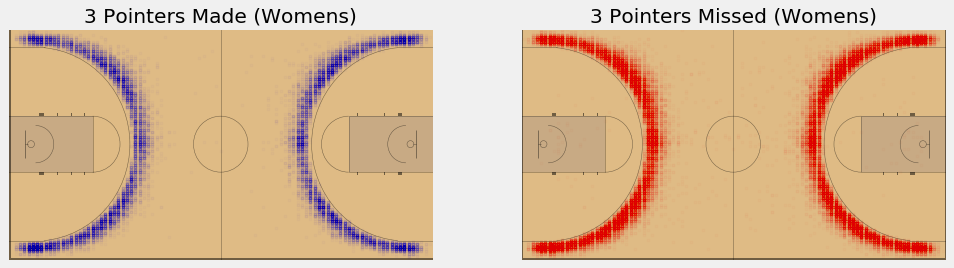

In [30]:
COURT_COLOR = '#dfbb85'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
# Where are 3 pointers made from? (This is really cool)
WEvents.query('EventType == "made3"') \
    .plot(x='X_', y='Y_', style='.',
          color='blue',
          title='3 Pointers Made (Womens)',
          alpha=0.01, ax=ax1)
ax1 = create_ncaa_full_court(ax1, lw=0.5, three_line='womens', paint_alpha=0.1)
ax1.set_facecolor(COURT_COLOR)
WEvents.query('EventType == "miss3"') \
    .plot(x='X_', y='Y_', style='.',
          title='3 Pointers Missed (Womens)',
          color='red',
          alpha=0.01, ax=ax2)
ax2.set_facecolor(COURT_COLOR)
ax2 = create_ncaa_full_court(ax2, lw=0.5, three_line='womens', paint_alpha=0.1)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

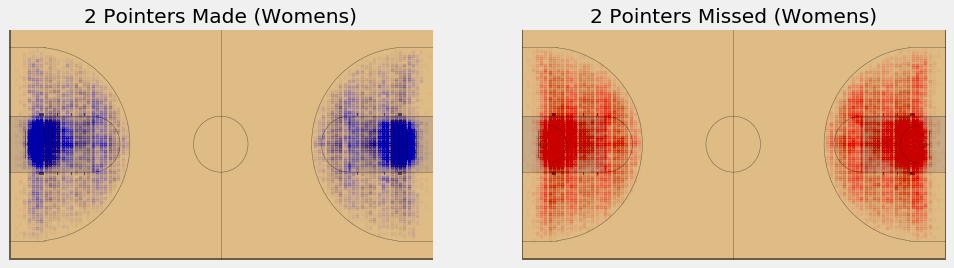

In [31]:
COURT_COLOR = '#dfbb85'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
# Where are 3 pointers made from? (This is really cool)
WEvents.query('EventType == "made2"') \
    .plot(x='X_', y='Y_', style='.',
          color='blue',
          title='2 Pointers Made (Womens)',
          alpha=0.01, ax=ax1)
ax1.set_facecolor(COURT_COLOR)
ax1 = create_ncaa_full_court(ax1, lw=0.5, three_line='womens', paint_alpha=0.1)
WEvents.query('EventType == "miss2"') \
    .plot(x='X_', y='Y_', style='.',
          title='2 Pointers Missed (Womens)',
          color='red',
          alpha=0.01, ax=ax2)
ax2.set_facecolor(COURT_COLOR)
ax2 = create_ncaa_full_court(ax2, lw=0.5, three_line='womens', paint_alpha=0.1)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

In [32]:
MPlayers = pd.read_csv(f'{MENS_DIR}/MPlayers.csv', error_bad_lines=False)
WPlayers = pd.read_csv(f'{WOMENS_DIR}/WPlayers.csv')

In [33]:
MPlayers.head()

,PlayerID,LastName,FirstName,TeamID
0,1,Albright,Christian,1101
1,2,Cameron,Tobias,1101
2,3,Cobb,Chase,1101
3,4,Cooke,Austin,1101
4,5,Crnic,Jovan,1101


In [34]:
# Merge Player name onto events
MEvents = MEvents.merge(MPlayers,
              how='left',
              left_on='EventPlayerID',
              right_on='PlayerID')

WEvents = WEvents.merge(WPlayers,
              how='left',
              left_on='EventPlayerID',
              right_on='PlayerID')

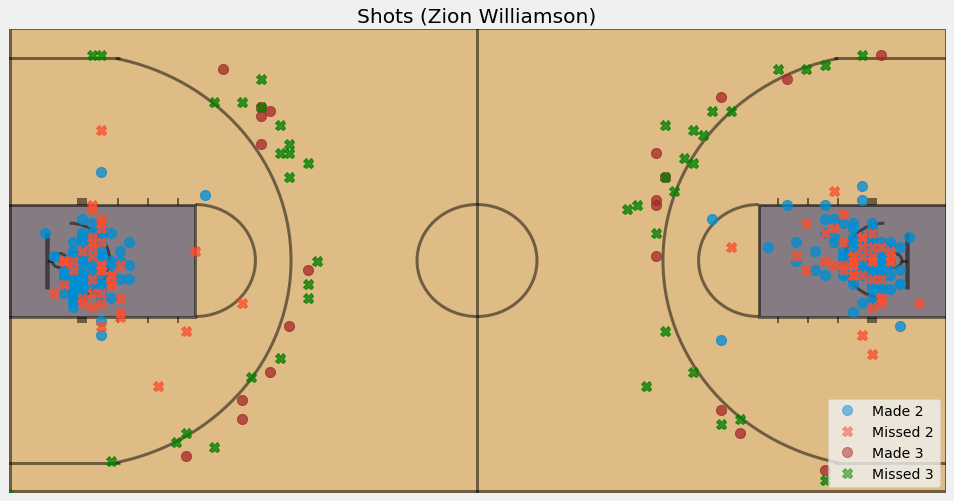

In [35]:
ms = 10 # Marker Size
FirstName = 'Zion'
LastName = 'Williamson'
fig, ax = plt.subplots(figsize=(15, 8))
ax = create_ncaa_full_court(ax)
MEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "made2"') \
    .plot(x='X_', y='Y_', style='o',
          title='Shots (Zion Williamson)',
          alpha=0.5,
         figsize=(15, 8),
         label='Made 2',
         ms=ms,
         ax=ax)
plt.legend()
MEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "miss2"') \
    .plot(x='X_', y='Y_', style='X',
          alpha=0.5, ax=ax,
         label='Missed 2',
         ms=ms)
plt.legend()
MEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "made3"') \
    .plot(x='X_', y='Y_', style='o',
          c='brown',
          alpha=0.5,
         figsize=(15, 8),
         label='Made 3', ax=ax,
         ms=ms)
plt.legend()
MEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "miss3"') \
    .plot(x='X_', y='Y_', style='X',
          c='green',
          alpha=0.5, ax=ax,
         label='Missed 3',
         ms=ms)
ax.set_xlabel('')
plt.legend()
plt.show()

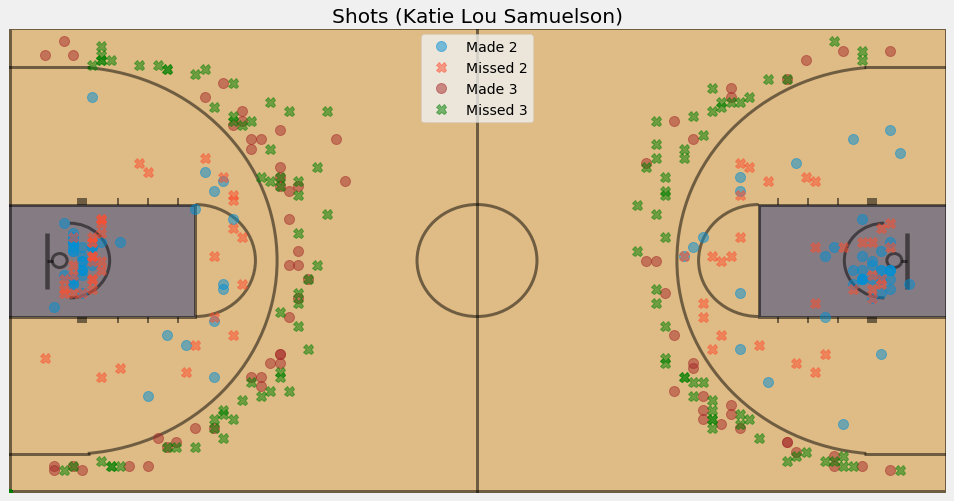

In [36]:
ms = 10 # Marker Size
FirstName = 'Katie Lou'
LastName = 'Samuelson'
fig, ax = plt.subplots(figsize=(15, 8))
ax = create_ncaa_full_court(ax, three_line='womens')
WEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "made2"') \
    .plot(x='X_', y='Y_', style='o',
          title='Shots (Katie Lou Samuelson)',
          alpha=0.5,
         figsize=(15, 8),
         label='Made 2',
         ms=ms,
         ax=ax)
plt.legend()
WEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "miss2"') \
    .plot(x='X_', y='Y_', style='X',
          alpha=0.5, ax=ax,
         label='Missed 2',
         ms=ms)
plt.legend()
WEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "made3"') \
    .plot(x='X_', y='Y_', style='o',
          c='brown',
          alpha=0.5,
         figsize=(15, 8),
         label='Made 3', ax=ax,
         ms=ms)
plt.legend()
WEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "miss3"') \
    .plot(x='X_', y='Y_', style='X',
          c='green',
          alpha=0.5, ax=ax,
         label='Missed 3',
         ms=ms)
ax.set_xlabel('')
plt.legend()
plt.show()

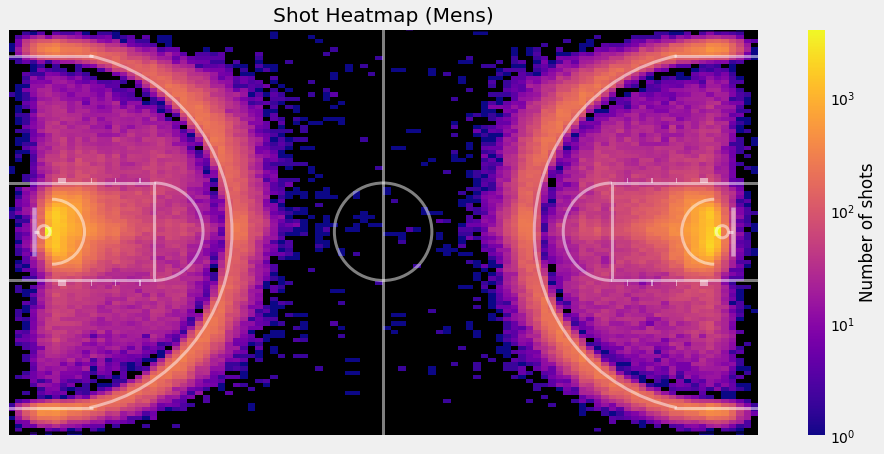

In [37]:
N_bins = 100
shot_events = MEvents.loc[MEvents['EventType'].isin(['miss3','made3','miss2','made2']) & (MEvents['X_'] != 0)]
fig, ax = plt.subplots(figsize=(15, 7))
ax = create_ncaa_full_court(ax,
                            paint_alpha=0.0,
                            three_line='mens',
                            court_color='black',
                            lines_color='white')
_ = plt.hist2d(shot_events['X_'].values + np.random.normal(0, 0.1, shot_events['X_'].shape), # Add Jitter to values for plotting
           shot_events['Y_'].values + np.random.normal(0, 0.1, shot_events['Y_'].shape),
           bins=N_bins, norm=mpl.colors.LogNorm(),
               cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of shots')

ax.set_title('Shot Heatmap (Mens)')
plt.show()

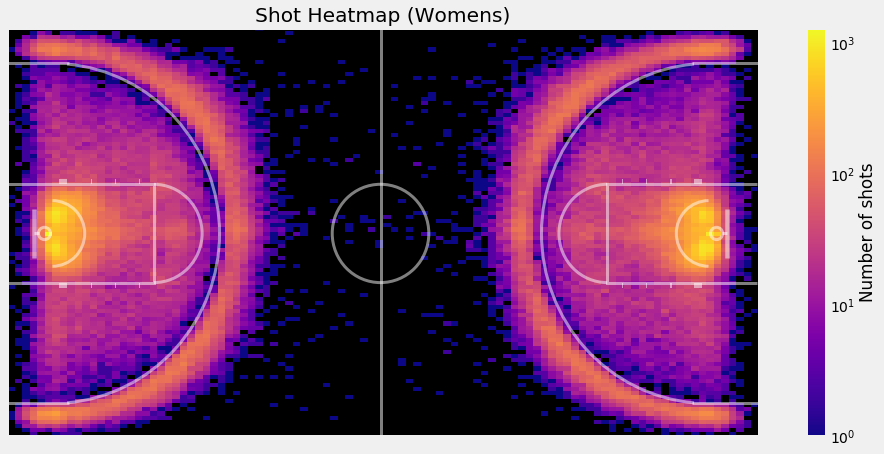

In [38]:
N_bins = 100
shot_events = WEvents.loc[WEvents['EventType'].isin(['miss3','made3','miss2','made2']) & (WEvents['X_'] != 0)]
fig, ax = plt.subplots(figsize=(15, 7))
ax = create_ncaa_full_court(ax, three_line='womens', paint_alpha=0.0,
                            court_color='black',
                            lines_color='white')
_ = plt.hist2d(shot_events['X_'].values + np.random.normal(0, 0.2, shot_events['X_'].shape),
           shot_events['Y_'].values + np.random.normal(0, 0.2, shot_events['Y_'].shape),
           bins=N_bins, norm=mpl.colors.LogNorm(),
               cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of shots')

ax.set_title('Shot Heatmap (Womens)')
plt.show()

In [39]:
MEvents['PointsScored'] =  0
MEvents.loc[MEvents['EventType'] == 'made2', 'PointsScored'] = 2
MEvents.loc[MEvents['EventType'] == 'made3', 'PointsScored'] = 3
MEvents.loc[MEvents['EventType'] == 'missed2', 'PointsScored'] = 0
MEvents.loc[MEvents['EventType'] == 'missed3', 'PointsScored'] = 0

In [87]:
# Upload game results
detailed_tour_results = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')
detailed_season_results = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv')
compact_tour_results = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
compact_season_results = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')

# Create unique join key
#cols = ['Season', 'DayNum', 'WTeamID','LTeamID']
#detailed_tour_results['game_id'] = detailed_tour_results[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#detailed_season_results['game_id'] = detailed_season_results[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#compact_tour_results['game_id'] = compact_tour_results[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#compact_season_results['game_id'] = compact_season_results[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)


# Join results tables
#master_season_results = pd.merge(detailed_season_results,compact_season_results,on='game_id')
#master_tour_results = pd.merge(detailed_tour_results,compact_tour_results,on='game_id')

list(detailed_tour_results)

['Season',
 'DayNum',
 'WTeamID',
 'WScore',
 'LTeamID',
 'LScore',
 'WLoc',
 'NumOT',
 'WFGM',
 'WFGA',
 'WFGM3',
 'WFGA3',
 'WFTM',
 'WFTA',
 'WOR',
 'WDR',
 'WAst',
 'WTO',
 'WStl',
 'WBlk',
 'WPF',
 'LFGM',
 'LFGA',
 'LFGM3',
 'LFGA3',
 'LFTM',
 'LFTA',
 'LOR',
 'LDR',
 'LAst',
 'LTO',
 'LStl',
 'LBlk',
 'LPF']

In [88]:
# Finding season results by game
winning_team_results_season = detailed_season_results[['Season',
 'DayNum',
 'WTeamID',
 'LTeamID',
 'WScore',
 'LScore',
 'WLoc',
 'NumOT',
 'WFGM',
 'WFGA',
 'WFGM3',
 'WFGA3',
 'WFTM',
 'WFTA',
 'WOR',
 'WDR',
 'WAst',
 'WTO',
 'WStl',
 'WBlk',
 'WPF']].rename(columns={'WTeamID':'TeamID',
                         'WScore':'Score_For',
                         'LScore':'Score_Against',
                         'LTeamID':'Opp_Team',
                         'WFGM':'FGM',
                         'WFGA':'FGA',
                         'WFGM3':'FGM3',
                         'WFGA3':'FGA3',
                         'WFTM':'FTM',
                         'WFTA':'FTA',
                         'WOR':'OR',
                         'WDR':'DR',
                         'WAst':'Ast',
                         'WTO':'TO',
                         'WStl':'Stl',
                         'WBlk':'Blk',
                         'WPF':'PF'})

winning_team_results_season['Loc']=winning_team_results_season['WLoc']
winning_team_results_season['Win']= 1
winning_team_results_season['Loss']= 0

losing_team_results_season = detailed_season_results[['Season',
 'DayNum',
 'LTeamID',
 'WTeamID',
 'LScore',
 'WScore',
 'WLoc',
 'NumOT',
 'LFGM',
 'LFGA',
 'LFGM3',
 'LFGA3',
 'LFTM',
 'LFTA',
 'LOR',
 'LDR',
 'LAst',
 'LTO',
 'LStl',
 'LBlk',
 'LPF']].rename(columns={'LTeamID':'TeamID',
                         'LScore':'Score_For',
                         'WScore':'Score_Against',
                         'WTeamID':'Opp_Team',
                         'LFGM':'FGM',
                         'LFGA':'FGA',
                         'LFGM3':'FGM3',
                         'LFGA3':'FGA3',
                         'LFTM':'FTM',
                         'LFTA':'FTA',
                         'LOR':'OR',
                         'LDR':'DR',
                         'LAst':'Ast',
                         'LTO':'TO',
                         'LStl':'Stl',
                         'LBlk':'Blk',
                         'LPF':'PF'})

conditions = [
    (losing_team_results_season['WLoc'] == 'H'),
    (losing_team_results_season['WLoc'] == 'A'),
    (losing_team_results_season['WLoc'] == 'N')]
choices = ['A','H','N']

losing_team_results_season['Win']= 0
losing_team_results_season['Loss']= 1

losing_team_results_season['Loc'] = np.select(conditions,choices)

# Opp Stats

winning_team_results_season_opp = detailed_season_results[['LFGM',
                                                          'LFGA',
                                                          'LFGM3',
                                                          'LFGA3',
                                                          'LFTM',
                                                          'LFTA',
                                                          'LOR',
                                                          'LDR',
                                                          'LAst',
                                                          'LTO',
                                                          'LStl',
                                                          'LBlk',
                                                          'LPF']].rename(columns={'LFGM':'Opp_FGM',
                                                                                  'LFGA':'Opp_FGA',
                                                                                  'LFGM3':'Opp_FGM3',
                                                                                  'LFGA3':'Opp_FGA3',
                                                                                  'LFTM':'Opp_FTM',
                                                                                  'LFTA':'Opp_FTA',
                                                                                  'LOR':'Opp_OR',
                                                                                  'LDR':'Opp_DR',
                                                                                  'LAst':'Opp_Ast',
                                                                                  'LTO':'Opp_TO',
                                                                                  'LStl':'Opp_Stl',
                                                                                  'LBlk':'Opp_Blk',
                                                                                  'LPF':'Opp_PF'})

winning_team_results_season = pd.concat([winning_team_results_season,winning_team_results_season_opp],axis=1)

losing_team_results_season_opp = detailed_season_results[['WFGM',
                                                          'WFGA',
                                                          'WFGM3',
                                                          'WFGA3',
                                                          'WFTM',
                                                          'WFTA',
                                                          'WOR',
                                                          'WDR',
                                                          'WAst',
                                                          'WTO',
                                                          'WStl',
                                                          'WBlk',
                                                          'WPF']].rename(columns={'WFGM':'Opp_FGM',
                                                                                  'WFGA':'Opp_FGA',
                                                                                  'WFGM3':'Opp_FGM3',
                                                                                  'WFGA3':'Opp_FGA3',
                                                                                  'WFTM':'Opp_FTM',
                                                                                  'WFTA':'Opp_FTA',
                                                                                  'WOR':'Opp_OR',
                                                                                  'WDR':'Opp_DR',
                                                                                  'WAst':'Opp_Ast',
                                                                                  'WTO':'Opp_TO',
                                                                                  'WStl':'Opp_Stl',
                                                                                  'WBlk':'Opp_Blk',
                                                                                  'WPF':'Opp_PF'})

losing_team_results_season = pd.concat([losing_team_results_season,losing_team_results_season_opp],axis=1)

total_game_results_season = pd.concat([winning_team_results_season,losing_team_results_season],sort=False)

# Finding tour statistics by game

winning_team_results_tour = detailed_tour_results[['Season',
 'DayNum',
 'WTeamID',
 'LTeamID',
 'WScore',
 'LScore',
 'WLoc',
 'NumOT',
 'WFGM',
 'WFGA',
 'WFGM3',
 'WFGA3',
 'WFTM',
 'WFTA',
 'WOR',
 'WDR',
 'WAst',
 'WTO',
 'WStl',
 'WBlk',
 'WPF']].rename(columns={'WTeamID':'TeamID',
                         'WScore':'Score_For',
                         'LScore':'Score_Against',
                         'LTeamID':'Opp_Team',
                         'WFGM':'FGM',
                         'WFGA':'FGA',
                         'WFGM3':'FGM3',
                         'WFGA3':'FGA3',
                         'WFTM':'FTM',
                         'WFTA':'FTA',
                         'WOR':'OR',
                         'WDR':'DR',
                         'WAst':'Ast',
                         'WTO':'TO',
                         'WStl':'Stl',
                         'WBlk':'Blk',
                         'WPF':'PF'})

winning_team_results_tour['Loc']=winning_team_results_tour['WLoc']
winning_team_results_tour['Win']= 1
winning_team_results_tour['Loss']= 0

losing_team_results_tour = detailed_tour_results[['Season',
 'DayNum',
 'LTeamID',
 'WTeamID',
 'LScore',
 'WScore',
 'WLoc',
 'NumOT',
 'LFGM',
 'LFGA',
 'LFGM3',
 'LFGA3',
 'LFTM',
 'LFTA',
 'LOR',
 'LDR',
 'LAst',
 'LTO',
 'LStl',
 'LBlk',
 'LPF']].rename(columns={'LTeamID':'TeamID',
                         'LScore':'Score_For',
                         'WScore':'Score_Against',
                         'WTeamID':'Opp_Team',
                         'LFGM':'FGM',
                         'LFGA':'FGA',
                         'LFGM3':'FGM3',
                         'LFGA3':'FGA3',
                         'LFTM':'FTM',
                         'LFTA':'FTA',
                         'LOR':'OR',
                         'LDR':'DR',
                         'LAst':'Ast',
                         'LTO':'TO',
                         'LStl':'Stl',
                         'LBlk':'Blk',
                         'LPF':'PF'})

conditions = [
    (losing_team_results_tour['WLoc'] == 'H'),
    (losing_team_results_tour['WLoc'] == 'A'),
    (losing_team_results_tour['WLoc'] == 'N')]
choices = ['A','H','N']

losing_team_results_tour['Win']= 0
losing_team_results_tour['Loss']= 1

losing_team_results_tour['Loc'] = np.select(conditions,choices)

# Opp Stats

winning_team_results_tour_opp = detailed_tour_results[['LFGM',
                                                          'LFGA',
                                                          'LFGM3',
                                                          'LFGA3',
                                                          'LFTM',
                                                          'LFTA',
                                                          'LOR',
                                                          'LDR',
                                                          'LAst',
                                                          'LTO',
                                                          'LStl',
                                                          'LBlk',
                                                          'LPF']].rename(columns={'LFGM':'Opp_FGM',
                                                                                  'LFGA':'Opp_FGA',
                                                                                  'LFGM3':'Opp_FGM3',
                                                                                  'LFGA3':'Opp_FGA3',
                                                                                  'LFTM':'Opp_FTM',
                                                                                  'LFTA':'Opp_FTA',
                                                                                  'LOR':'Opp_OR',
                                                                                  'LDR':'Opp_DR',
                                                                                  'LAst':'Opp_Ast',
                                                                                  'LTO':'Opp_TO',
                                                                                  'LStl':'Opp_Stl',
                                                                                  'LBlk':'Opp_Blk',
                                                                                  'LPF':'Opp_PF'})

winning_team_results_tour = pd.concat([winning_team_results_tour,winning_team_results_tour_opp],axis=1)

losing_team_results_tour_opp = detailed_tour_results[['WFGM',
                                                          'WFGA',
                                                          'WFGM3',
                                                          'WFGA3',
                                                          'WFTM',
                                                          'WFTA',
                                                          'WOR',
                                                          'WDR',
                                                          'WAst',
                                                          'WTO',
                                                          'WStl',
                                                          'WBlk',
                                                          'WPF']].rename(columns={'WFGM':'Opp_FGM',
                                                                                  'WFGA':'Opp_FGA',
                                                                                  'WFGM3':'Opp_FGM3',
                                                                                  'WFGA3':'Opp_FGA3',
                                                                                  'WFTM':'Opp_FTM',
                                                                                  'WFTA':'Opp_FTA',
                                                                                  'WOR':'Opp_OR',
                                                                                  'WDR':'Opp_DR',
                                                                                  'WAst':'Opp_Ast',
                                                                                  'WTO':'Opp_TO',
                                                                                  'WStl':'Opp_Stl',
                                                                                  'WBlk':'Opp_Blk',
                                                                                  'WPF':'Opp_PF'})

losing_team_results_tour = pd.concat([losing_team_results_tour,losing_team_results_tour_opp],axis=1)

total_game_results_tour = pd.concat([winning_team_results_tour,losing_team_results_tour],sort=False)

In [89]:
total_game_results_season

,Season,DayNum,TeamID,Opp_Team,Score_For,Score_Against,WLoc,NumOT,FGM,FGA,...,Opp_FGA3,Opp_FTM,Opp_FTA,Opp_OR,Opp_DR,Opp_Ast,Opp_TO,Opp_Stl,Opp_Blk,Opp_PF
0,2003,10,1104,1328,68,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,1393,70,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,1437,73,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,1457,56,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,1208,77,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87499,2019,132,1222,1153,57,69,N,0,19,62,...,17,19,25,12,27,6,11,2,3,16
87500,2019,132,1426,1209,64,73,N,0,23,64,...,22,25,34,5,31,8,10,4,5,18
87501,2019,132,1276,1277,60,65,N,0,21,51,...,23,12,16,11,27,14,9,2,6,10
87502,2019,132,1382,1387,53,55,N,0,19,56,...,22,7,15,15,25,13,6,6,8,11


In [90]:
# Team and Tour team totals by season
team_season_totals = total_game_results_season.groupby(['Season',
                                   'TeamID'])[
                                     'Score_For',
                                     'Score_Against',
                                     #'WLoc',
                                     #'NumOT',
                                     'FGM',
                                     'FGA',
                                     'FGM3',
                                     'FGA3',
                                     'FTM',
                                     'FTA',
                                     'OR',
                                     'DR',
                                     'Ast',
                                     'TO',
                                     'Stl',
                                     'Blk',
                                     'PF',
                                     #'Loc',
                                     'Win',
                                     'Loss',
                                     'Opp_FGM',
                                     'Opp_FGA',
                                     'Opp_FGM3',
                                     'Opp_FGA3',
                                     'Opp_FTM',
                                     'Opp_FTA',
                                     'Opp_OR',
                                     'Opp_DR',
                                     'Opp_Ast',
                                     'Opp_TO',
                                     'Opp_Stl',
                                     'Opp_Blk',
                                     'Opp_PF'].sum()

team_tour_totals = total_game_results_tour.groupby(['Season',
                                   'TeamID'])[
                                     'Score_For',
                                     'Score_Against',
                                     #'WLoc',
                                     #'NumOT',
                                     'FGM',
                                     'FGA',
                                     'FGM3',
                                     'FGA3',
                                     'FTM',
                                     'FTA',
                                     'OR',
                                     'DR',
                                     'Ast',
                                     'TO',
                                     'Stl',
                                     'Blk',
                                     'PF',
                                     #'Loc',
                                     'Win',
                                     'Loss',
                                     'Opp_FGM',
                                     'Opp_FGA',
                                     'Opp_FGM3',
                                     'Opp_FGA3',
                                     'Opp_FTM',
                                     'Opp_FTA',
                                     'Opp_OR',
                                     'Opp_DR',
                                     'Opp_Ast',
                                     'Opp_TO',
                                     'Opp_Stl',
                                     'Opp_Blk',
                                     'Opp_PF'].sum()

team_tour_totals

Score_For  Score_Against  FGM  FGA  FGM3  FGA3  FTM  FTA  OR  \
Season TeamID                                                                 
2003   1104           62             67   22   52     5    12   13   16   9   
       1112          339            295  124  271    31    83   60   77  54   
       1113          160            179   59  128    10    29   32   45  27   
       1120          211            204   76  176    21    59   38   50  40   
       1122           64             86   24   54     2    21   14   22   8   
...                  ...            ...  ...  ...   ...   ...  ...  ...  ..   
2019   1439          206            185   69  167    20    52   48   61  30   
       1449          137            142   48  111    19    46   22   31  15   
       1458           54             72   20   60     6    30    8   13  16   
       1459          140            130   47  110    21    55   25   32  15   
       1463           74             79   27   72     8    37   12   15  12   

                DR  ...  Opp_FGA3  Opp_FTM  Opp_FTA  Opp_OR  Opp_DR  Opp_Ast  \
Season TeamID       ...                                                        
2003   1104     20  ...        18       22       26      13      22       15   
       1112    121  ...        95       46       64      48     102       63   
       1113     41  ...        37       37       55      32      50       32   
       1120     71  ...        61       47       58      42      65       30   
       1122     21  ...        24        8       13      15      29       18   
...            ...  ...       ...      ...      ...     ...     ...      ...   
2019   1439     69  ...        74       29       40      23      76       39   
       1449     38  ...        41       24       30      30      53       31   
       1458     19  ...        15        9       11       6      28       12   
       1459     41  ...        40       26       35      22      46       21   
       1463     26  ...        17       19       28      12      34       12   

               Opp_TO  Opp_Stl  Opp_Blk  Opp_PF  
Season TeamID                                    
2003   1104         8        1        2      17  
       1112        62       34       17      76  
       1113        25        8       11      38  
       1120        40       24       18      59  
       1122        12       12        4      22  
...               ...      ...      ...     ...  
2019   1439        41       14       14      53  
       1449        36        8        5      31  
       1458        12        6        5      14  
       1459        22       11        4      32  
       1463        11        7        6      11  

[1132 rows x 30 columns]

In [91]:
# Create Offensive Efficiency and Defensive Efficiency Metric
#field goals attempted - offensive rebounds + turnovers + (0.4 x free throws attempted) = total number of possessions for the season. Divide the team's total points scored for the season by the possessions

team_season_totals['Off_Eff'] = team_season_totals['Score_For'] / (
    team_season_totals['FGA'] - team_season_totals['OR'] + team_season_totals['TO'] + (
        .4 * team_season_totals['FTA']
    )
)

team_tour_totals['Off_Eff'] = team_tour_totals['Score_For'] / (
    team_tour_totals['FGA'] - team_tour_totals['OR'] + team_tour_totals['TO'] + (
        .4 * team_tour_totals['FTA']
    )
)

team_season_totals['Def_Eff'] = team_season_totals['Score_Against'] / (
    team_season_totals['Opp_FGA'] - team_season_totals['Opp_OR'] + team_season_totals['Opp_TO'] + (
        .4 * team_season_totals['Opp_FTA']
    )
)

team_tour_totals['Def_Eff'] = team_tour_totals['Score_Against'] / (
    team_tour_totals['Opp_FGA'] - team_tour_totals['Opp_OR'] + team_tour_totals['Opp_TO'] + (
        .4 * team_tour_totals['Opp_FTA']
    )
)

team_season_totals['Net_Eff'] = team_season_totals['Off_Eff'] - team_season_totals['Def_Eff']
team_tour_totals['Net_Eff'] = team_tour_totals['Off_Eff'] - team_tour_totals['Def_Eff']

team_season_totals

Score_For  Score_Against  FGM   FGA  FGM3  FGA3  FTM  FTA   OR  \
Season TeamID                                                                   
2003   1102         1603           1596  536  1114   219   583  312  479  117   
       1103         2127           2110  733  1508   147   434  514  698  264   
       1104         1940           1820  673  1601   178   556  416  586  380   
       1105         1866           1993  634  1602   197   540  401  568  351   
       1106         1781           1785  656  1548   171   494  298  461  344   
...                  ...            ...  ...   ...   ...   ...  ...  ...  ...   
2019   1462         2372           2330  862  1843   231   694  417  608  344   
       1463         2265           2064  835  1683   218   583  377  514  243   
       1464         2205           2377  805  1909   287   840  308  442  389   
       1465         1962           1955  677  1535   229   656  379  493  262   
       1466         1903           2173  665  1730   210   706  363  533  315   

                DR  ...  Opp_OR  Opp_DR  Opp_Ast  Opp_TO  Opp_Stl  Opp_Blk  \
Season TeamID       ...                                                      
2003   1102    471  ...     269     564      256     363      152       44   
       1103    538  ...     325     595      418     414      173       77   
       1104    670  ...     305     634      327     388      155       89   
       1105    601  ...     343     686      411     489      244      109   
       1106    668  ...     317     626      330     422      246       89   
...            ...  ...     ...     ...      ...     ...      ...      ...   
2019   1462    850  ...     324     730      474     365      231      100   
       1463    835  ...     269     682      355     314      199       83   
       1464    720  ...     294     773      424     345      177      100   
       1465    683  ...     280     649      292     281      144       68   
       1466    728  ...     244     838      400     353      189      138   

               Opp_PF   Off_Eff   Def_Eff   Net_Eff  
Season TeamID                                        
2003   1102       514  1.062575  1.065705 -0.003131  
       1103       606  1.140972  1.130034  0.010938  
       1104       539  1.061618  0.995079  0.066538  
       1105       496  0.950489  1.030613 -0.080124  
       1106       452  0.954755  0.966956 -0.012201  
...               ...       ...       ...       ...  
2019   1462       575  1.084988  1.062375  0.022613  
       1463       480  1.123178  1.018756  0.104421  
       1464       455  1.054620  1.145321 -0.090701  
       1465       477  1.092914  1.094625 -0.001710  
       1466       469  0.940124  1.088023 -0.147899  

[5834 rows x 33 columns]

In [92]:
# Team Metric Building
# Point Diff per game
team_season_totals['PtDiffPGm']= (team_season_totals['Score_For']-team_season_totals['Score_Against'])/(team_season_totals['Win']+team_season_totals['Loss'])
team_tour_totals['PtDiffPGm']= (team_tour_totals['Score_For']-team_tour_totals['Score_Against'])/(team_tour_totals['Win']+team_tour_totals['Loss'])

# FG%
team_season_totals['FG%'] = team_season_totals['FGM']/team_season_totals['FGA']
team_tour_totals['FG%'] = team_tour_totals['FGM']/team_tour_totals['FGA']

team_season_totals['Opp_FG%'] = team_season_totals['Opp_FGM3']/team_season_totals['Opp_FGA3']
team_tour_totals['Opp_FG%'] = team_tour_totals['Opp_FGM3']/team_tour_totals['Opp_FGA3']

# 3Pt%
team_season_totals['FG3%'] = team_season_totals['FGM']/team_season_totals['FGA']
team_tour_totals['FG3%'] = team_tour_totals['FGM']/team_tour_totals['FGA']

team_season_totals['Opp_FG3%'] = team_season_totals['Opp_FGM']/team_season_totals['Opp_FGA']
team_tour_totals['Opp_FG3%'] = team_tour_totals['Opp_FGM']/team_tour_totals['Opp_FGA']

# FT%

team_season_totals['FG3%'] = team_season_totals['FGM']/team_season_totals['FGA']
team_tour_totals['FG3%'] = team_tour_totals['FGM']/team_tour_totals['FGA']

team_season_totals['Opp_FG3%'] = team_season_totals['Opp_FGM']/team_season_totals['Opp_FGA']
team_tour_totals['Opp_FG3%'] = team_tour_totals['Opp_FGM']/team_tour_totals['Opp_FGA']

# OR%

team_season_totals['OR%'] = team_season_totals['OR']/(team_season_totals['OR']+team_season_totals['Opp_DR'])
team_tour_totals['OR%'] = team_tour_totals['OR']/(team_tour_totals['OR']+team_tour_totals['Opp_DR'])

team_season_totals['Opp_OR%'] = team_season_totals['Opp_OR']/(team_season_totals['Opp_OR']+team_season_totals['DR'])
team_tour_totals['Opp_OR%'] = team_tour_totals['Opp_OR']/(team_tour_totals['Opp_OR']+team_tour_totals['DR'])

# DR%

team_season_totals['DR%'] = team_season_totals['DR']/(team_season_totals['DR']+team_season_totals['Opp_OR'])
team_tour_totals['DR%'] = team_tour_totals['DR']/(team_tour_totals['DR']+team_tour_totals['Opp_OR'])

team_season_totals['Opp_DR%'] = team_season_totals['Opp_DR']/(team_season_totals['Opp_DR']+team_season_totals['OR'])
team_tour_totals['Opp_DR%'] = team_tour_totals['Opp_DR']/(team_tour_totals['Opp_DR']+team_tour_totals['OR'])

# TO%

team_tour_totals['TO%'] = team_tour_totals['TO'] / (
    team_tour_totals['FGA'] - team_tour_totals['OR'] + team_tour_totals['TO'] + (
        .44 * team_tour_totals['FTA']
    )
)

team_season_totals['TO%'] = team_season_totals['TO'] / (
    team_season_totals['FGA'] - team_season_totals['OR'] + team_season_totals['TO'] + (
        .44 * team_season_totals['FTA']
    )
)

team_tour_totals['Opp_TO%'] = team_tour_totals['Opp_TO'] / (
    team_tour_totals['Opp_FGA'] - team_tour_totals['Opp_OR'] + team_tour_totals['Opp_TO'] + (
        .44 * team_tour_totals['Opp_FTA']
    )
)

team_season_totals['Opp_TO%'] = team_season_totals['Opp_TO'] / (
    team_season_totals['Opp_FGA'] - team_season_totals['Opp_OR'] + team_season_totals['Opp_TO'] + (
        .44 * team_season_totals['Opp_FTA']
    )
)

#eFG% - Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA

team_season_totals['eFG%'] = (team_season_totals['FGM'] + (.5*team_season_totals['FGM3']))/team_season_totals['FGA']
team_tour_totals['eFG%'] = (team_tour_totals['FGM'] + (.5*team_tour_totals['FGM3']))/team_tour_totals['FGA']

team_season_totals['Opp_eFG%'] = (team_season_totals['Opp_FGM'] + (.5*team_season_totals['Opp_FGM3']))/team_season_totals['Opp_FGA']
team_tour_totals['Opp_eFG%'] = (team_tour_totals['Opp_FGM'] + (.5*team_tour_totals['Opp_FGM3']))/team_tour_totals['Opp_FGA']



In [93]:
team_season_totals = team_season_totals.reset_index()
cols = ['Season','TeamID']
team_season_totals['TeamYear'] = team_season_totals[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

team_tour_totals = team_tour_totals.reset_index()
cols = ['Season','TeamID']
team_tour_totals['TeamYear'] = team_tour_totals[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

list(team_season_totals)

['Season',
 'TeamID',
 'Score_For',
 'Score_Against',
 'FGM',
 'FGA',
 'FGM3',
 'FGA3',
 'FTM',
 'FTA',
 'OR',
 'DR',
 'Ast',
 'TO',
 'Stl',
 'Blk',
 'PF',
 'Win',
 'Loss',
 'Opp_FGM',
 'Opp_FGA',
 'Opp_FGM3',
 'Opp_FGA3',
 'Opp_FTM',
 'Opp_FTA',
 'Opp_OR',
 'Opp_DR',
 'Opp_Ast',
 'Opp_TO',
 'Opp_Stl',
 'Opp_Blk',
 'Opp_PF',
 'Off_Eff',
 'Def_Eff',
 'Net_Eff',
 'PtDiffPGm',
 'FG%',
 'Opp_FG%',
 'FG3%',
 'Opp_FG3%',
 'OR%',
 'Opp_OR%',
 'DR%',
 'Opp_DR%',
 'TO%',
 'Opp_TO%',
 'eFG%',
 'Opp_eFG%',
 'TeamYear']

In [94]:
Coaches = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MTeamCoaches.csv')

# The coach with which the team finished the season
Coaches = Coaches[Coaches['LastDayNum']==154]

# Create unique identifier
cols = ['Season','TeamID']
Coaches['TeamYear'] = Coaches[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

Coaches[['CoachName','TeamYear']]

,CoachName,TeamYear
0,reggie_minton,1985_1102
1,bob_huggins,1985_1103
2,wimp_sanderson,1985_1104
3,james_oliver,1985_1106
4,davey_whitney,1985_1108
...,...,...
11343,travis_steele,2019_1462
11344,james_jones,2019_1463
11345,jerrod_calhoun,2019_1464
11346,rick_croy,2019_1465


In [95]:
team_season_totals = pd.merge(team_season_totals,Coaches[['CoachName','TeamYear']],on='TeamYear')
team_tour_totals = pd.merge(team_tour_totals,Coaches[['CoachName','TeamYear']],on='TeamYear')

In [96]:
Coach_career_record_season = team_season_totals.groupby(['CoachName'])['Win','Loss'].sum()
Coach_career_record_season['Coach_W/L%'] = Coach_career_record_season['Win']/(Coach_career_record_season['Win'] + Coach_career_record_season['Loss'])
Coach_career_record_season['Games_Coached'] = Coach_career_record_season['Win'] + Coach_career_record_season['Loss']
Coach_career_record_season.sort_values(by='Coach_W/L%',ascending=False).head(50)
# Note: .7188 winning% and 100 wins Regular Season

conditions = [
    (Coach_career_record_season['Win'] > 100) & (Coach_career_record_season['Coach_W/L%'] > .7188)]
choices = [1]
Coach_career_record_season['Elite_Coach'] = np.select(conditions, choices, default=0)

Coach_career_record_tour = team_tour_totals.groupby(['CoachName'])['Win','Loss'].sum()
Coach_career_record_tour['Coach_W/L%'] = Coach_career_record_tour['Win']/(Coach_career_record_tour['Win'] + Coach_career_record_tour['Loss'])
Coach_career_record_tour['Games_Coached'] = Coach_career_record_tour['Win'] + Coach_career_record_tour['Loss']
Coach_career_record_tour.sort_values(by='Coach_W/L%',ascending=False).head(50)
# Note: .55 winning% and 5 tour wins

conditions = [
    (Coach_career_record_tour['Win'] > 8) & (Coach_career_record_tour['Coach_W/L%'] > .55)]
choices = [1]
Coach_career_record_tour['Elite_Coach'] = np.select(conditions, choices, default=0)

Coach_career_record_tour.sort_values(by='Coach_W/L%',ascending=False).head(50)
Coach_career_record_season.sort_values(by='Coach_W/L%',ascending=False).head(50)

,Win,Loss,Coach_W/L%,Games_Coached,Elite_Coach
CoachName,,,,,
mark_few,453,85,0.842007,538,1
bill_self,455,97,0.824275,552,1
john_calipari,461,100,0.821747,561,1
mike_krzyzewski,456,102,0.817204,558,1
chris_jans,73,19,0.793478,92,0
brad_stevens,148,43,0.774869,191,1
eric_musselman,101,30,0.770992,131,1
roy_williams,424,127,0.769510,551,1
bo_ryan,314,99,0.760291,413,1


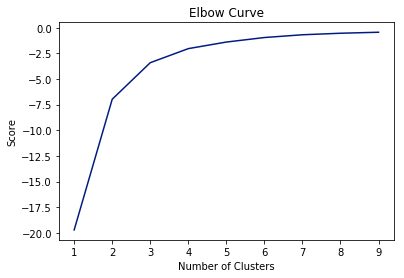

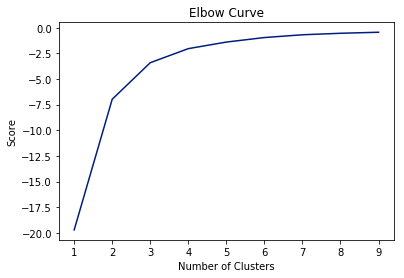

In [97]:
# Create Coach Cluster Labels Season
Coach_career_record_season = Coach_career_record_season.reset_index()
X_season=Coach_career_record_season.loc[:,['CoachName','Win','Coach_W/L%']]
X_season.head(10)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 

scaled_features = X_season.copy()
col_names = ['Win','Coach_W/L%']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
X_season = scaled_features

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = Coach_career_record_season[['Coach_W/L%']]
X_axis = Coach_career_record_season[['Games_Coached']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(X_season[X_season.columns[1:3]]) # Compute k-means clustering.
X_season['Coach_Cluster_Label_Season'] = kmeans.fit_predict(X_season[X_season.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X_season[X_season.columns[1:3]]) # Labels of each point
#X_season.sort_values(by='Win',ascending=False).head(51)

Coach_career_record_season = pd.merge(Coach_career_record_season,X_season[['CoachName','Coach_Cluster_Label_Season']],on='CoachName')

# Create Coach Cluster Labels Tour
Coach_career_record_tour = Coach_career_record_tour.reset_index()
X_tour=Coach_career_record_tour.loc[:,['CoachName','Win','Coach_W/L%']]
X_tour.head(10)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 

scaled_features = X_tour.copy()
col_names = ['Win','Coach_W/L%']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
X_tour = scaled_features

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = Coach_career_record_season[['Coach_W/L%']]
X_axis = Coach_career_record_season[['Games_Coached']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(X_tour[X_tour.columns[1:3]]) # Compute k-means clustering.
X_tour['Coach_Cluster_Label_Tour'] = kmeans.fit_predict(X_tour[X_tour.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X_tour[X_tour.columns[1:3]]) # Labels of each point
X_tour.sort_values(by='Win',ascending=False).head(51)

Coach_career_record_tour = pd.merge(Coach_career_record_tour,X_tour[['CoachName','Coach_Cluster_Label_Tour']],on='CoachName')


In [98]:
Coach_career_record_season = Coach_career_record_season.reset_index()
team_season_totals = pd.merge(team_season_totals,Coach_career_record_season[['CoachName','Coach_W/L%','Games_Coached','Elite_Coach','Coach_Cluster_Label_Season']],on='CoachName')

Coach_career_record_tour = Coach_career_record_tour.reset_index()
team_tour_totals = pd.merge(team_tour_totals,Coach_career_record_tour[['CoachName','Coach_W/L%','Games_Coached','Elite_Coach','Coach_Cluster_Label_Tour']],on='CoachName')
list(team_tour_totals)

['Season',
 'TeamID',
 'Score_For',
 'Score_Against',
 'FGM',
 'FGA',
 'FGM3',
 'FGA3',
 'FTM',
 'FTA',
 'OR',
 'DR',
 'Ast',
 'TO',
 'Stl',
 'Blk',
 'PF',
 'Win',
 'Loss',
 'Opp_FGM',
 'Opp_FGA',
 'Opp_FGM3',
 'Opp_FGA3',
 'Opp_FTM',
 'Opp_FTA',
 'Opp_OR',
 'Opp_DR',
 'Opp_Ast',
 'Opp_TO',
 'Opp_Stl',
 'Opp_Blk',
 'Opp_PF',
 'Off_Eff',
 'Def_Eff',
 'Net_Eff',
 'PtDiffPGm',
 'FG%',
 'Opp_FG%',
 'FG3%',
 'Opp_FG3%',
 'OR%',
 'Opp_OR%',
 'DR%',
 'Opp_DR%',
 'TO%',
 'Opp_TO%',
 'eFG%',
 'Opp_eFG%',
 'TeamYear',
 'CoachName',
 'Coach_W/L%',
 'Games_Coached',
 'Elite_Coach',
 'Coach_Cluster_Label_Tour']

In [99]:
team_tour_totals[['Win','Season','TeamID']].sort_values(by='Win',ascending=False).head()

conditions = [
    (team_tour_totals['Win'] == 6),
    (team_tour_totals['Win'] == 5),
    (team_tour_totals['Win'] == 4),
    (team_tour_totals['Win'] == 3),
    (team_tour_totals['Win'] == 2),
    (team_tour_totals['Win'] == 1)
]
choices = ['Champion','RunnerUp','Final4','Elite8','Sweet16','Round32']
team_tour_totals['Tourney_Result'] = np.select(conditions, choices, default='Round64')
team_season_totals['Tourney_Result'] = team_tour_totals['Tourney_Result']


In [100]:
Coach_tour_round = team_tour_totals[['CoachName','Tourney_Result']]

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

Coach_tour_round = encode_and_bind(Coach_tour_round, 'Tourney_Result')
Coach_tour_round = Coach_tour_round.groupby(['CoachName'])['Tourney_Result_Champion',
                                        'Tourney_Result_Elite8',
                                        'Tourney_Result_Final4',
                                        'Tourney_Result_Round32',
                                        'Tourney_Result_Round64',
                                        'Tourney_Result_RunnerUp',
                                        'Tourney_Result_Sweet16'].sum()
Coach_tour_round = Coach_tour_round.reset_index()
Coach_tour_round = Coach_tour_round.rename(columns={'Tourney_Result_Champion':'Coach_Championships',
                                                    'Tourney_Result_Elite8':'Coach_Elite8s',
                                                    'Tourney_Result_Final4':'Coach_Final4s',
                                                    'Tourney_Result_Round32':'Coach_Round32s',
                                                    'Tourney_Result_Round64':'Coach_Round64s',
                                                    'Tourney_Result_RunnerUp':'Coach_RunnerUps',
                                                    'Tourney_Result_Sweet16':'Coach_Sweet16s'})


In [101]:
team_tour_totals = pd.merge(team_tour_totals,Coach_tour_round,on='CoachName')
team_season_totals = pd.merge(team_season_totals,Coach_tour_round,on='CoachName')

In [102]:
team_season_totals.head()

,Season,TeamID,Score_For,Score_Against,FGM,FGA,FGM3,FGA3,FTM,FTA,...,Elite_Coach,Coach_Cluster_Label_Season,Tourney_Result,Coach_Championships,Coach_Elite8s,Coach_Final4s,Coach_Round32s,Coach_Round64s,Coach_RunnerUps,Coach_Sweet16s
0,2003,1102,1603,1596,536,1114,219,583,312,479,...,0,4,Round64,0,0,0,0,1,0,0
1,2004,1102,1685,1412,568,1177,237,622,312,440,...,0,4,Elite8,0,0,0,0,1,0,0
2,2005,1343,1516,1488,491,1075,191,529,343,460,...,0,4,Round64,0,0,0,0,1,0,0
3,2006,1343,1356,1449,452,1080,203,552,249,320,...,0,4,Round32,0,0,0,0,1,0,0
4,2007,1343,1410,1493,484,1181,204,598,238,357,...,0,4,Sweet16,0,0,0,0,1,0,0


In [103]:
# Win/Loss Records by Team
team_season_totals['Win%'] = team_season_totals['Win']/(team_season_totals['Win']+team_season_totals['Loss'])
team_tour_totals['Win%'] = team_tour_totals['Win']/(team_tour_totals['Win']+team_tour_totals['Loss'])

team_season_WL = team_season_totals[['Season','TeamID','Win','Loss','Win%']]
team_tour_WL = team_tour_totals[['Season','TeamID','Win','Loss','Win%']]

In [104]:
#Pythagorean Expectation. Using 11.5 as exponent
#PointsFor^11.5  /  PointsFor^11.5 + PointsAgainst^11.5
team_season_totals['Pythag_W%'] = team_season_totals['Score_For']**11.5 / (team_season_totals['Score_For']**11.5 + team_season_totals['Score_Against']**11.5)
team_tour_totals['Pythag_W%'] = team_tour_totals['Score_For']**11.5 / (team_tour_totals['Score_For']**11.5 + team_tour_totals['Score_Against']**11.5)

team_season_WL['Pythag_W%'] = team_season_totals['Score_For']**11.5 / (team_season_totals['Score_For']**11.5 + team_season_totals['Score_Against']**11.5)
team_tour_WL['Pythag_W%'] = team_tour_totals['Score_For']**11.5 / (team_tour_totals['Score_For']**11.5 + team_tour_totals['Score_Against']**11.5)

team_season_totals['Pythag_W'] = team_season_totals['Pythag_W%']*(team_season_totals['Win']+team_season_totals['Loss'])
team_tour_totals['Pythag_W'] = team_tour_totals['Pythag_W%']*(team_tour_totals['Win']+team_tour_totals['Loss'])

team_season_WL['Pythag_W'] = team_season_WL['Pythag_W%']*(team_season_WL['Win']+team_season_WL['Loss'])
team_tour_WL['Pythag_W'] = team_tour_WL['Pythag_W%']*(team_tour_WL['Win']+team_tour_WL['Loss'])

team_season_WL

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

,Season,TeamID,Win,Loss,Win%,Pythag_W%,Pythag_W
0,2003,1102,12,16,0.428571,0.512579,14.352224
1,2004,1102,22,6,0.785714,0.884190,24.757322
2,2005,1343,14,13,0.518519,0.553392,14.941595
3,2006,1343,12,14,0.461538,0.318029,8.268743
4,2007,1343,11,17,0.392857,0.341240,9.554710
...,...,...,...,...,...,...,...
3465,2019,1139,16,16,0.500000,0.551574,17.650356
3466,2018,1361,21,10,0.677419,0.797114,24.710530
3467,2019,1361,20,13,0.606061,0.614623,20.282574
3468,2018,1449,20,12,0.625000,0.566901,18.140833


In [105]:
team_tour_totals

,Season,TeamID,Score_For,Score_Against,FGM,FGA,FGM3,FGA3,FTM,FTA,...,Coach_Championships,Coach_Elite8s,Coach_Final4s,Coach_Round32s,Coach_Round64s,Coach_RunnerUps,Coach_Sweet16s,Win%,Pythag_W%,Pythag_W
0,2003,1104,62,67,22,52,5,12,13,16,...,0,1,0,2,3,0,2,0.000000,0.290714,0.290714
1,2004,1104,286,289,91,208,26,76,78,101,...,0,1,0,2,3,0,2,0.750000,0.470036,1.880143
2,2005,1104,73,83,26,50,9,23,12,16,...,0,1,0,2,3,0,2,0.000000,0.185974,0.185974
3,2006,1104,149,147,47,94,14,34,41,56,...,0,1,0,2,3,0,2,0.500000,0.538774,1.077548
4,2012,1301,202,188,70,174,16,45,46,69,...,0,1,0,2,3,0,2,0.666667,0.695508,2.086523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,2019,1341,76,82,28,64,15,28,5,7,...,0,0,0,0,1,0,0,0.000000,0.294456,0.294456
1128,2019,1385,65,74,22,69,8,31,13,23,...,0,0,0,0,1,0,0,0.000000,0.183727,0.183727
1129,2019,1429,61,78,19,54,7,20,16,20,...,0,0,0,0,1,0,0,0.000000,0.055877,0.055877
1130,2019,1433,58,73,19,61,6,26,14,17,...,0,0,0,0,1,0,0,0.000000,0.066286,0.066286


In [106]:
Ranks = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MMasseyOrdinals.csv')
Rank_systems = Ranks.SystemName.unique()
Rank_systems

# Create unique identifier
cols = ['Season','TeamID']
Ranks['TeamYear'] = Ranks[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

Ranks_Pre_Tour = Ranks[Ranks['RankingDayNum'] == 133]


In [107]:
Ranks_Pre_Tour_AP = Ranks_Pre_Tour[Ranks_Pre_Tour['SystemName'] == 'AP'] 
Ranks_Pre_Tour_POM = Ranks_Pre_Tour[Ranks_Pre_Tour['SystemName'] == 'POM']

Ranks_Pre_Tour_Composite = pd.DataFrame(Ranks_Pre_Tour.groupby(['TeamYear'])['OrdinalRank'].mean()).reset_index()
Ranks_Pre_Tour_Composite['OrdinalRank']
Ranks_Pre_Tour_AP['OrdinalRank']
Ranks_Pre_Tour_POM['OrdinalRank']

127259     160
127260     163
127261      33
127262     307
127263     263
          ... 
3812063     64
3812064     82
3812065    263
3812066    192
3812067    285
Name: OrdinalRank, Length: 5830, dtype: int64

In [108]:
Ranks_Pre_Tour = pd.merge(
    (pd.merge(
        Ranks_Pre_Tour_Composite,
        Ranks_Pre_Tour_POM,
        on='TeamYear',
        how='outer')
    ),Ranks_Pre_Tour_AP,
    on='TeamYear',
    how='outer').fillna('NR')[['TeamYear',
                               'OrdinalRank_x',
                               'OrdinalRank_y',
                               'OrdinalRank']].rename(columns={'OrdinalRank_x':'Composite_rank',
                                                               'OrdinalRank_y':'KenPom_rank',
                                                               'OrdinalRank':'AP_rank'})


In [109]:
team_tour_totals = pd.merge(team_tour_totals,Ranks_Pre_Tour,on='TeamYear')
team_season_totals = pd.merge(team_season_totals,Ranks_Pre_Tour,on='TeamYear')

In [110]:
Conferences = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MTeamConferences.csv')

# Create unique identifier
cols = ['Season','TeamID']
Conferences['TeamYear'] = Ranks[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

team_tour_totals = pd.merge(team_tour_totals,Conferences[['TeamYear','ConfAbbrev']],on='TeamYear')
team_season_totals = pd.merge(team_season_totals,Conferences[['TeamYear','ConfAbbrev']],on='TeamYear')

In [111]:
#list(team_tour_totals)
list(team_season_totals)

['Season',
 'TeamID',
 'Score_For',
 'Score_Against',
 'FGM',
 'FGA',
 'FGM3',
 'FGA3',
 'FTM',
 'FTA',
 'OR',
 'DR',
 'Ast',
 'TO',
 'Stl',
 'Blk',
 'PF',
 'Win',
 'Loss',
 'Opp_FGM',
 'Opp_FGA',
 'Opp_FGM3',
 'Opp_FGA3',
 'Opp_FTM',
 'Opp_FTA',
 'Opp_OR',
 'Opp_DR',
 'Opp_Ast',
 'Opp_TO',
 'Opp_Stl',
 'Opp_Blk',
 'Opp_PF',
 'Off_Eff',
 'Def_Eff',
 'Net_Eff',
 'PtDiffPGm',
 'FG%',
 'Opp_FG%',
 'FG3%',
 'Opp_FG3%',
 'OR%',
 'Opp_OR%',
 'DR%',
 'Opp_DR%',
 'TO%',
 'Opp_TO%',
 'eFG%',
 'Opp_eFG%',
 'TeamYear',
 'CoachName',
 'Coach_W/L%',
 'Games_Coached',
 'Elite_Coach',
 'Coach_Cluster_Label_Season',
 'Tourney_Result',
 'Coach_Championships',
 'Coach_Elite8s',
 'Coach_Final4s',
 'Coach_Round32s',
 'Coach_Round64s',
 'Coach_RunnerUps',
 'Coach_Sweet16s',
 'Win%',
 'Pythag_W%',
 'Pythag_W',
 'Composite_rank',
 'KenPom_rank',
 'AP_rank',
 'ConfAbbrev']

In [112]:
compact = pd.concat([compact_season_results,compact_tour_results])

compactW = compact[['Season','WTeamID','LTeamID']].rename(columns={'WTeamID':'TeamID',
                                                                         'LTeamID':'Opp_TeamID'})
compactW['Win']=1

compactL = compact[['Season','LTeamID','WTeamID']].rename(columns={'WTeamID':'Opp_TeamID',
                                                                         'LTeamID':'TeamID'})

compactL['Win']=0

compact = pd.concat([compactW,compactL])

compact

cols = ['Season','TeamID','Opp_TeamID']
compact['ID'] = compact[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

cols = ['Season','TeamID']
compact['TeamYear'] = compact[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

cols = ['Season','Opp_TeamID']
compact['Opp_TeamYear'] = compact[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

compact = compact[['ID','TeamYear','Win','Opp_TeamYear']]

compact

,ID,TeamYear,Win,Opp_TeamYear
0,1985_1228_1328,1985_1228,1,1985_1328
1,1985_1106_1354,1985_1106,1,1985_1354
2,1985_1112_1223,1985_1112,1,1985_1223
3,1985_1165_1432,1985_1165,1,1985_1432
4,1985_1192_1447,1985_1192,1,1985_1447
...,...,...,...,...
2246,2019_1246_1120,2019_1246,0,2019_1120
2247,2019_1181_1277,2019_1181,0,2019_1277
2248,2019_1277_1403,2019_1277,0,2019_1403
2249,2019_1120_1438,2019_1120,0,2019_1438


In [113]:
master_team_features = pd.concat([team_season_totals,team_tour_totals])

print(master_team_features)

     AP_rank  Ast  Blk   CoachName  Coach_Championships  \
0         NR  364   50   joe_scott                    0   
1         NR  364   50   joe_scott                    0   
2         NR  364   50   joe_scott                    0   
3         NR  364   50   joe_scott                    0   
4         NR  364   50   joe_scott                    0   
...      ...  ...  ...         ...                  ...   
2392      12   31    4  thad_matta                    0   
2393      12   31    4  thad_matta                    0   
2394      12   31    4  thad_matta                    0   
2395      12   31    4  thad_matta                    0   
2396      12   31    4  thad_matta                    0   

      Coach_Cluster_Label_Season  Coach_Cluster_Label_Tour  Coach_Elite8s  \
0                            4.0                       NaN              0   
1                            4.0                       NaN              0   
2                            4.0                       NaN  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [115]:
#compact['TeamYear'] = compact['TeamYear'].astype(str)
#master_team_features['TeamYear'] = master_team_features['TeamYear'].astype(str)

#pd.merge(compact, master_team_features,on='TeamYear',how='left')
#compact.join(master_team_features,on='TeamYear')

compact.dtypes
master_team_features = master_team_features.infer_objects()
master_team_features.dtypes.head(55)

master_team_features[['Coach_Championships',
                      'Coach_Elite8s',
                      'Coach_Final4s',
                      'Coach_Round32s',
                      'Coach_Round64s',
                      'Coach_RunnerUps',
                      'Coach_Sweet16s']] = master_team_features[['Coach_Championships',
                      'Coach_Elite8s',
                      'Coach_Final4s',
                      'Coach_Round32s',
                      'Coach_Round64s',
                      'Coach_RunnerUps',
                      'Coach_Sweet16s']].astype('int64')

master_team_features[['CoachName',
                      'AP_rank',
                      'ConfAbbrev',
                     'TeamYear',
                     'Tourney_Result']] = master_team_features[['CoachName',
                                                             'AP_rank',
                                                             'ConfAbbrev',
                                                               'TeamYear',
                     'Tourney_Result']].astype(str)

In [116]:

master_team_features[['CoachName',
                      'AP_rank',
                      'ConfAbbrev',
                     'TeamYear',
                     'Tourney_Result']] = master_team_features[['CoachName',
                                                             'AP_rank',
                                                             'ConfAbbrev',
                                                                'TeamYear',
                                                                'Tourney_Result']].astype(str)
master_team_features.dtypes.tail(55)

ConfAbbrev         object
DR                  int64
DR%               float64
Def_Eff           float64
Elite_Coach         int64
FG%               float64
FG3%              float64
FGA                 int64
FGA3                int64
FGM                 int64
FGM3                int64
FTA                 int64
FTM                 int64
Games_Coached       int64
KenPom_rank       float64
Loss                int64
Net_Eff           float64
OR                  int64
OR%               float64
Off_Eff           float64
Opp_Ast             int64
Opp_Blk             int64
Opp_DR              int64
Opp_DR%           float64
Opp_FG%           float64
Opp_FG3%          float64
Opp_FGA             int64
Opp_FGA3            int64
Opp_FGM             int64
Opp_FGM3            int64
Opp_FTA             int64
Opp_FTM             int64
Opp_OR              int64
Opp_OR%           float64
Opp_PF              int64
Opp_Stl             int64
Opp_TO              int64
Opp_TO%           float64
Opp_eFG%    

In [117]:
compact.dtypes.head(10)
compact

,ID,TeamYear,Win,Opp_TeamYear
0,1985_1228_1328,1985_1228,1,1985_1328
1,1985_1106_1354,1985_1106,1,1985_1354
2,1985_1112_1223,1985_1112,1,1985_1223
3,1985_1165_1432,1985_1165,1,1985_1432
4,1985_1192_1447,1985_1192,1,1985_1447
...,...,...,...,...
2246,2019_1246_1120,2019_1246,0,2019_1120
2247,2019_1181_1277,2019_1181,0,2019_1277
2248,2019_1277_1403,2019_1277,0,2019_1403
2249,2019_1120_1438,2019_1120,0,2019_1438


In [118]:
compact_with_features = pd.merge(compact,
                                 master_team_features,
                                 on='TeamYear',
                                 how='right').rename(columns={'Win_y':'SeasonWins',
                                                             'Win_x':'Win'})

#df = df.drop([], axis = 1)
compact_with_features
#master_team_features

,ID,TeamYear,Win,Opp_TeamYear,AP_rank,Ast,Blk,CoachName,Coach_Championships,Coach_Cluster_Label_Season,...,Score_For,Season,Stl,TO,TO%,TeamID,Tourney_Result,SeasonWins,Win%,eFG%
0,2003_1104_1328,2003_1104,1,2003_1328,NR,339,106,mark_gottfried,0,8.0,...,1940,2003,185,372,0.200990,1104,Round64,17,0.607143,0.475953
1,2003_1104_1106,2003_1104,1,2003_1106,NR,339,106,mark_gottfried,0,8.0,...,1940,2003,185,372,0.200990,1104,Round64,17,0.607143,0.475953
2,2003_1104_1292,2003_1104,1,2003_1292,NR,339,106,mark_gottfried,0,8.0,...,1940,2003,185,372,0.200990,1104,Round64,17,0.607143,0.475953
3,2003_1104_1326,2003_1104,1,2003_1326,NR,339,106,mark_gottfried,0,8.0,...,1940,2003,185,372,0.200990,1104,Round64,17,0.607143,0.475953
4,2003_1104_1422,2003_1104,1,2003_1422,NR,339,106,mark_gottfried,0,8.0,...,1940,2003,185,372,0.200990,1104,Round64,17,0.607143,0.475953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249058,2003_1253_1429,2003_1253,0,2003_1429,NR,306,68,larry_reynolds,0,0.0,...,1627,2003,117,445,0.260094,1253,nan,4,0.153846,0.487994
249059,2003_1253_1169,2003_1253,0,2003_1169,NR,306,68,larry_reynolds,0,0.0,...,1627,2003,117,445,0.260094,1253,nan,4,0.153846,0.487994
249060,2003_1253_1364,2003_1253,0,2003_1364,NR,306,68,larry_reynolds,0,0.0,...,1627,2003,117,445,0.260094,1253,nan,4,0.153846,0.487994
249061,2003_1253_1142,2003_1253,0,2003_1142,NR,306,68,larry_reynolds,0,0.0,...,1627,2003,117,445,0.260094,1253,nan,4,0.153846,0.487994


In [119]:
opp_features = compact_with_features[['ID',
 'TeamYear',
 'AP_rank',
 'CoachName',
 'Coach_Championships',
 'Coach_Cluster_Label_Season',
 'Coach_Cluster_Label_Tour',
 'Coach_Elite8s',
 'Coach_Final4s',
 'Coach_Round32s',
 'Coach_Round64s',
 'Coach_RunnerUps',
 'Coach_Sweet16s',
 'Coach_W/L%',
 'Composite_rank',
 'ConfAbbrev',
 'Def_Eff',
 'Elite_Coach',
 'Games_Coached',
 'KenPom_rank',
 'Net_Eff',
 'Off_Eff',
 'PtDiffPGm',
 'Pythag_W',
 'Pythag_W%',
 'Score_Against',
 'Score_For',
 'Season',
 'TeamID',
 'Tourney_Result',
 'SeasonWins',
 'Win%']].add_prefix('Opp_')

opp_features

,Opp_ID,Opp_TeamYear,Opp_AP_rank,Opp_CoachName,Opp_Coach_Championships,Opp_Coach_Cluster_Label_Season,Opp_Coach_Cluster_Label_Tour,Opp_Coach_Elite8s,Opp_Coach_Final4s,Opp_Coach_Round32s,...,Opp_PtDiffPGm,Opp_Pythag_W,Opp_Pythag_W%,Opp_Score_Against,Opp_Score_For,Opp_Season,Opp_TeamID,Opp_Tourney_Result,Opp_SeasonWins,Opp_Win%
0,2003_1104_1328,2003_1104,NR,mark_gottfried,0,8.0,NaN,1,0,2,...,4.285714,18.920899,0.675746,1820,1940,2003,1104,Round64,17,0.607143
1,2003_1104_1106,2003_1104,NR,mark_gottfried,0,8.0,NaN,1,0,2,...,4.285714,18.920899,0.675746,1820,1940,2003,1104,Round64,17,0.607143
2,2003_1104_1292,2003_1104,NR,mark_gottfried,0,8.0,NaN,1,0,2,...,4.285714,18.920899,0.675746,1820,1940,2003,1104,Round64,17,0.607143
3,2003_1104_1326,2003_1104,NR,mark_gottfried,0,8.0,NaN,1,0,2,...,4.285714,18.920899,0.675746,1820,1940,2003,1104,Round64,17,0.607143
4,2003_1104_1422,2003_1104,NR,mark_gottfried,0,8.0,NaN,1,0,2,...,4.285714,18.920899,0.675746,1820,1940,2003,1104,Round64,17,0.607143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249058,2003_1253_1429,2003_1253,NR,larry_reynolds,0,0.0,NaN,0,0,0,...,-12.038462,3.035893,0.116765,1940,1627,2003,1253,nan,4,0.153846
249059,2003_1253_1169,2003_1253,NR,larry_reynolds,0,0.0,NaN,0,0,0,...,-12.038462,3.035893,0.116765,1940,1627,2003,1253,nan,4,0.153846
249060,2003_1253_1364,2003_1253,NR,larry_reynolds,0,0.0,NaN,0,0,0,...,-12.038462,3.035893,0.116765,1940,1627,2003,1253,nan,4,0.153846
249061,2003_1253_1142,2003_1253,NR,larry_reynolds,0,0.0,NaN,0,0,0,...,-12.038462,3.035893,0.116765,1940,1627,2003,1253,nan,4,0.153846


In [68]:
opp_features.dtypes
opp_features = opp_features.infer_objects()
#opp_features.dtypes.head(55)


opp_features[['Opp_CoachName',
              'Opp_AP_rank',
              'Opp_ConfAbbrev',
              'Opp_TeamYear',
              'Opp_Tourney_Result']] = opp_features[['Opp_CoachName',
                                                     'Opp_AP_rank',
                                                     'Opp_ConfAbbrev',
                                                     'Opp_TeamYear',
                                                     'Opp_Tourney_Result']].astype('|S')

opp_features.dtypes.head(55)

Opp_ID                             object
Opp_TeamYear                       object
Opp_AP_rank                        object
Opp_CoachName                      object
Opp_Coach_Championships             int64
Opp_Coach_Cluster_Label_Season    float64
Opp_Coach_Cluster_Label_Tour      float64
Opp_Coach_Elite8s                   int64
Opp_Coach_Final4s                   int64
Opp_Coach_Round32s                  int64
Opp_Coach_Round64s                  int64
Opp_Coach_RunnerUps                 int64
Opp_Coach_Sweet16s                  int64
Opp_Coach_W/L%                    float64
Opp_Composite_rank                float64
Opp_ConfAbbrev                     object
Opp_Def_Eff                       float64
Opp_Elite_Coach                     int64
Opp_Games_Coached                   int64
Opp_KenPom_rank                   float64
Opp_Net_Eff                       float64
Opp_Off_Eff                       float64
Opp_PtDiffPGm                     float64
Opp_Pythag_W                      

In [74]:
opp_compact_with_features = pd.merge(compact,
                              opp_features,
                              left_on='TeamYear',
                              right_on='Opp_TeamYear')

In [75]:
opp_compact_with_features

,ID,TeamYear,Win,Opp_TeamYear_x,Opp_ID,Opp_TeamYear_y,Opp_AP_rank,Opp_CoachName,Opp_Coach_Championships,Opp_Coach_Cluster_Label_Season,...,Opp_PtDiffPGm,Opp_Pythag_W,Opp_Pythag_W%,Opp_Score_Against,Opp_Score_For,Opp_Season,Opp_TeamID,Opp_Tourney_Result,Opp_SeasonWins,Opp_Win%


In [65]:
df_concat = pd.concat([compact_with_features, opp_compact_with_features], axis=1)
print(df_concat)

                     ID   TeamYear  Win Opp_TeamYear AP_rank    Ast    Blk  \
0        2003_1104_1328  2003_1104  1.0    2003_1328      NR  339.0  106.0   
1        2003_1104_1106  2003_1104  1.0    2003_1106      NR  339.0  106.0   
2        2003_1104_1292  2003_1104  1.0    2003_1292      NR  339.0  106.0   
3        2003_1104_1326  2003_1104  1.0    2003_1326      NR  339.0  106.0   
4        2003_1104_1422  2003_1104  1.0    2003_1422      NR  339.0  106.0   
...                 ...        ...  ...          ...     ...    ...    ...   
7875465             NaN        NaN  NaN          NaN     NaN    NaN    NaN   
7875466             NaN        NaN  NaN          NaN     NaN    NaN    NaN   
7875467             NaN        NaN  NaN          NaN     NaN    NaN    NaN   
7875468             NaN        NaN  NaN          NaN     NaN    NaN    NaN   
7875469             NaN        NaN  NaN          NaN     NaN    NaN    NaN   

              CoachName  Coach_Championships  Coach_Cluster_Lab

In [ ]:
compact_with_features = compact_with_features.set_index('TeamYear')
opp_features = opp_features.set_index('Opp_TeamYear')

compact_with_features_m = compact_with_features.join(opp_features, how='left',rsuffix='_opp')


#compact_with_features = pd.merge(compact_with_features,
#                              opp_features,
#                              left_on='TeamYear',
#                              right_on='Opp_TeamYear')
compact_with_features_m


In [86]:
compact_with_features

,ID,Win,Opp_TeamYear_x,AP_rank,Ast,Blk,CoachName,Coach_Championships,Coach_Cluster_Label_Season,Coach_Cluster_Label_Tour,...,Opp_PtDiffPGm,Opp_Pythag_W,Opp_Pythag_W%,Opp_Score_Against,Opp_Score_For,Opp_Season,Opp_TeamID,Opp_Tourney_Result,Opp_SeasonWins,Opp_Win%
TeamYear,,,,,,,,,,,,,,,,,,,,,
